In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df=pd.read_csv('C:/Users/HMC/Documents/UM/customer satisfaction/customer_support_tickets.csv')
print(df.head(5))
df.info()
des=df.describe(include='all')
print(des)

   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

In [14]:
m=df.isnull().sum()
print(m)

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [5]:
n=df.isna().sum()
print(n)

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


# Analysis of Numerical Variables

In [15]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='object']
print(numerical_feature)

['Ticket ID', 'Customer Age', 'Customer Satisfaction Rating']


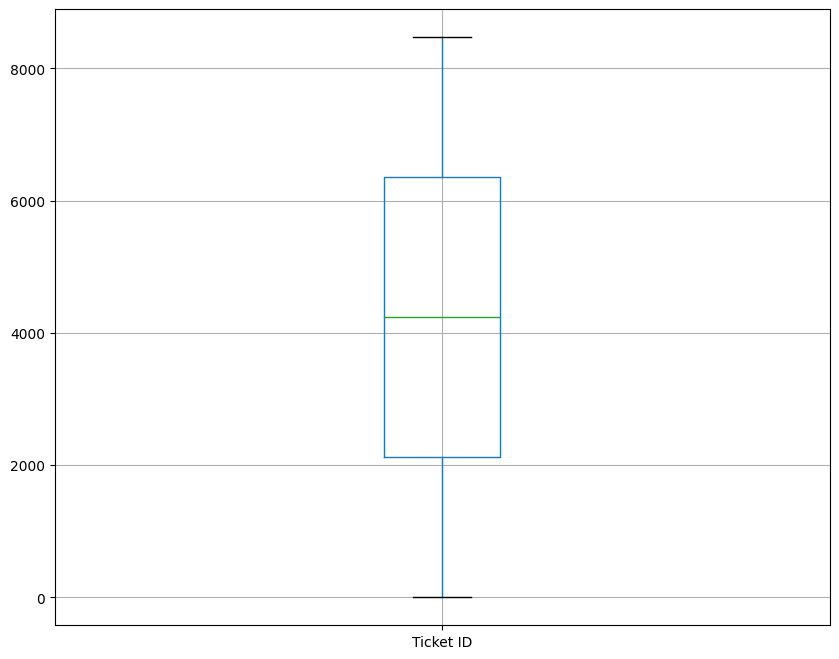

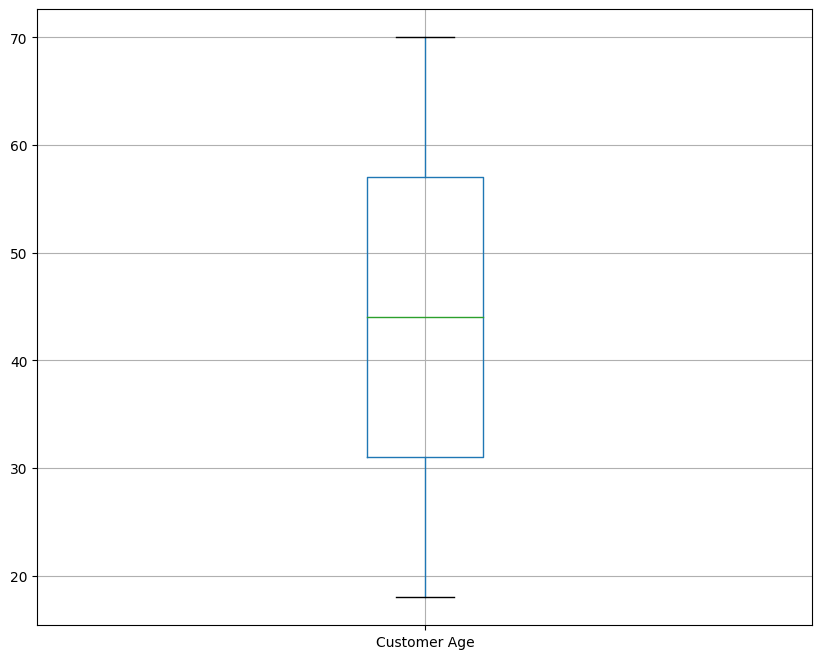

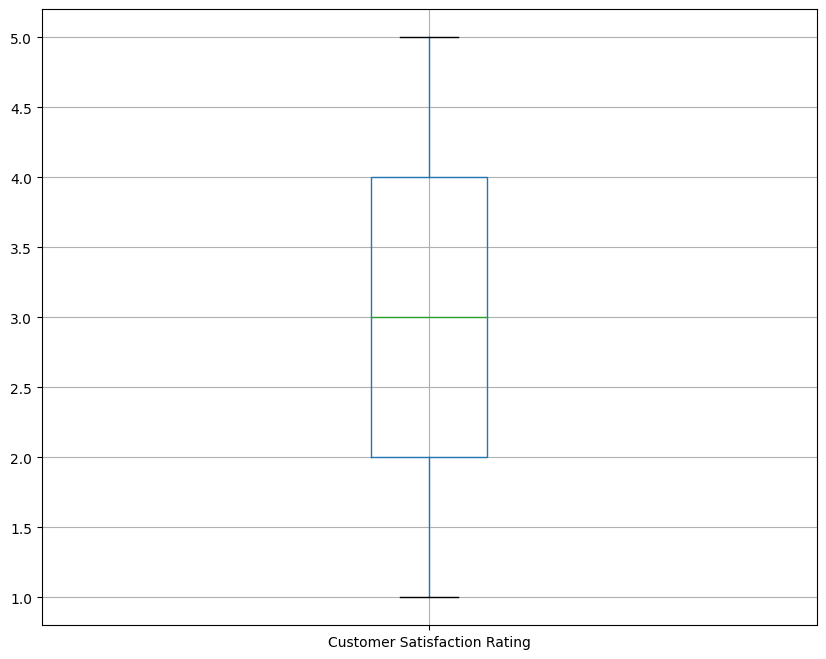

In [16]:
for i in numerical_feature:
    df.boxplot(column=i,figsize=(10,8))
    plt.xticks(rotation=0)
    plt.show()

In [17]:


df['Customer Satisfaction Rating'].fillna('Missing',inplace=True)
print(df[numerical_feature].isnull().sum())

Ticket ID                       0
Customer Age                    0
Customer Satisfaction Rating    0
dtype: int64


# Analysis of Categorical Variables

In [18]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='object']
feature_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='object']
df[feature_nan]=df[feature_nan].fillna('Missing')
print(df[categorical_feature].isnull().sum())

Customer Name                   0
Customer Email                  0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64


# Count of each Product Purchased

        Product Purchased  Count
0         Adobe Photoshop    181
1             Amazon Echo    221
2           Amazon Kindle    198
3           Apple AirPods    213
4                Asus ROG    187
5        Autodesk AutoCAD    196
6       Bose QuietComfort    190
7  Bose SoundLink Speaker    197
8       Canon DSLR Camera    206
9               Canon EOS    240


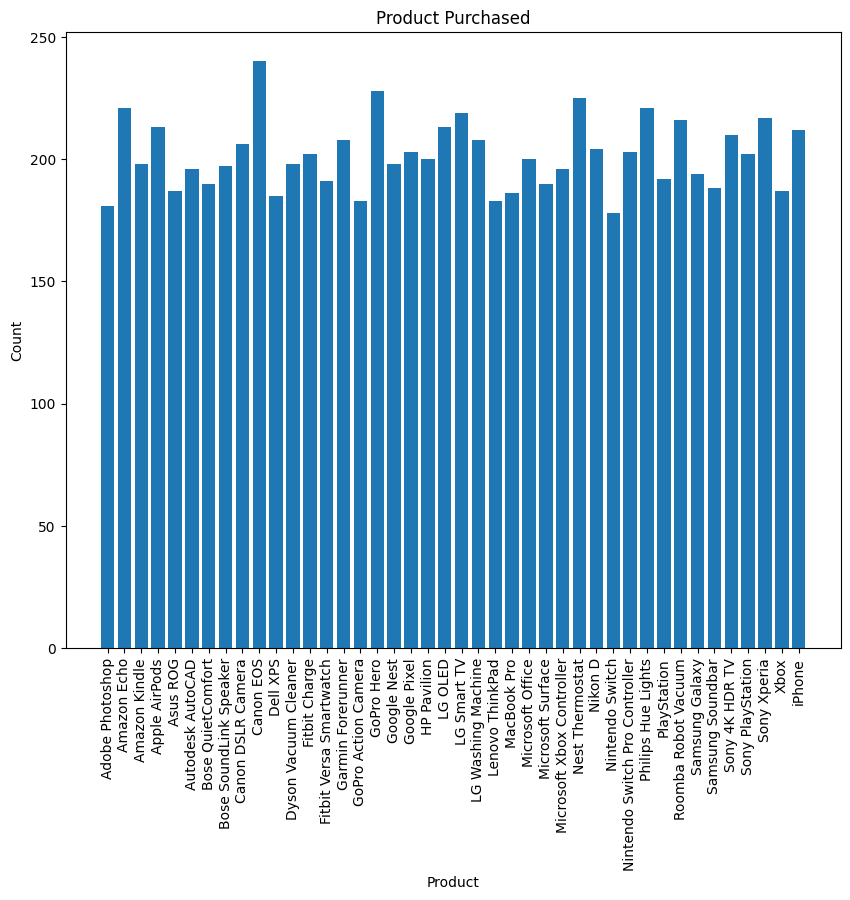

In [10]:
data=df.copy()
data=data.groupby('Product Purchased')['Ticket ID'].count().reset_index()
data=data.rename(columns={'Ticket ID':'Count'})
print(data.head(10))

plt.figure(figsize=(10,8))
plt.bar(data['Product Purchased'],data['Count'])
plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Product Purchased')
plt.xticks(rotation=90)
plt.show()


# Classification of tickets based on Ticket Status

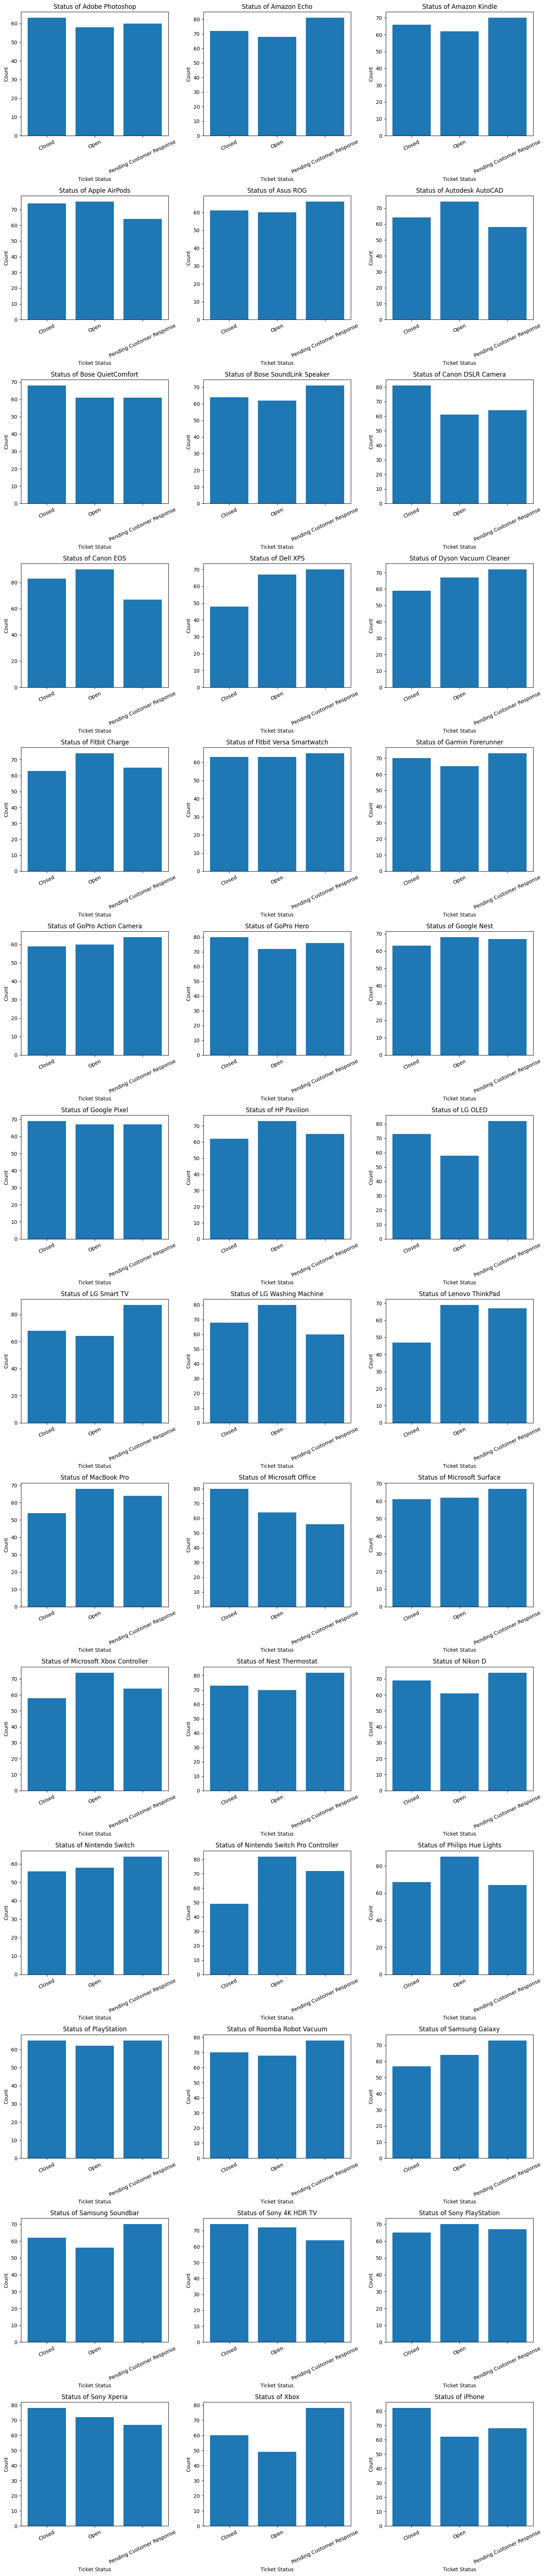

In [11]:
import math

data=df.copy()
data=data.groupby(['Product Purchased','Ticket Status'])['Ticket ID'].count().reset_index()
prod=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(prod)/ncols)

fig,axes=plt.subplots(nrows,ncols,figsize=(15,5*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,product in enumerate(prod):
    ax=axes[i]
    d=data[data['Product Purchased']==product]
    ax.bar(d['Ticket Status'],d['Ticket ID'])
    ax.set_xlabel('Ticket Status')
    ax.set_ylabel('Count')
    ax.set_title(f"Status of {product}")
    ax.tick_params(axis='x',rotation=25)

plt.tight_layout()
plt.show()



               Ticket Status  Count
0                     Closed   2769
1                       Open   2819
2  Pending Customer Response   2881


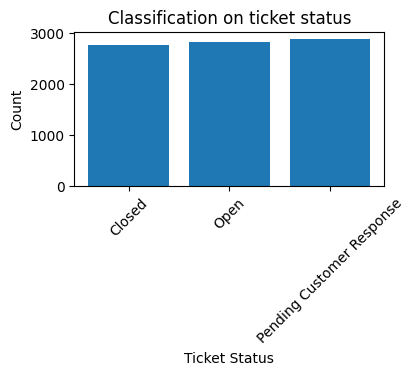

In [78]:
data=df.copy()
data=data.groupby('Ticket Status')['Ticket ID'].count().reset_index()
data=data.rename(columns={'Ticket ID':'Count'})
print(data.head(10))

plt.figure(figsize=(4,2))
plt.bar(data['Ticket Status'],data['Count'])
plt.xlabel('Ticket Status')
plt.ylabel('Count')
plt.title('Classification on ticket status')
plt.xticks(rotation=45)
plt.show()

# Classification based on Ticket Priority

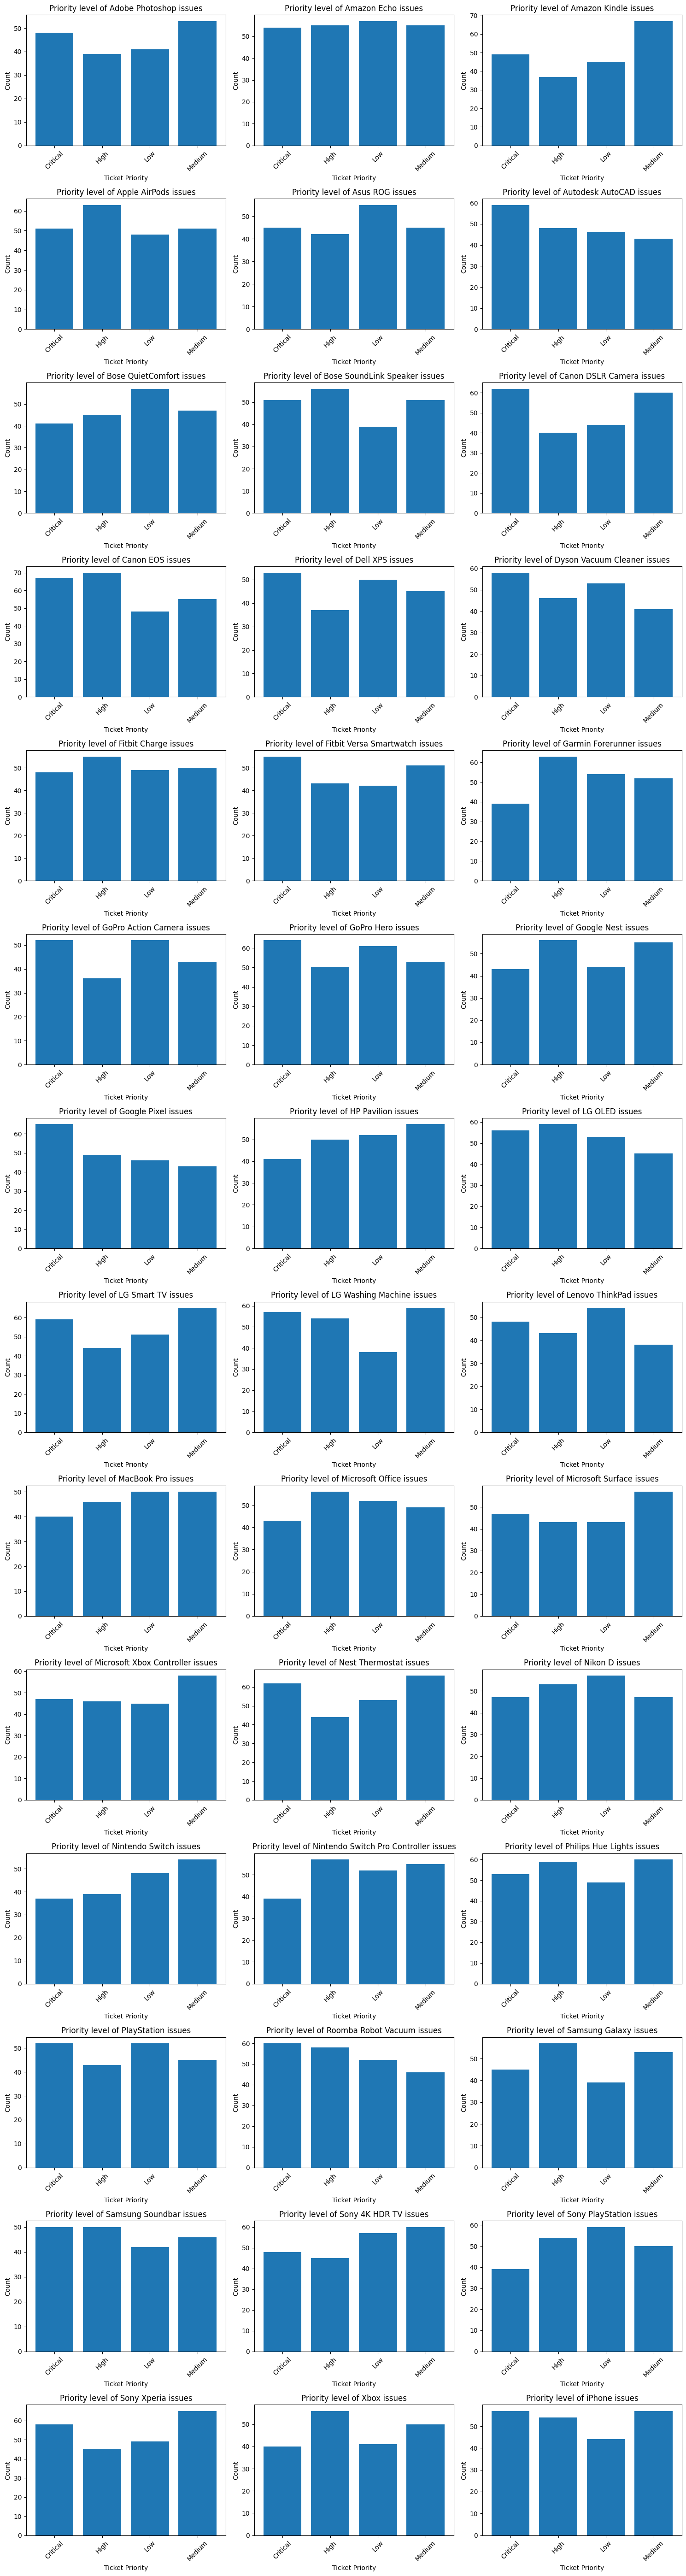

In [12]:
import math

data=df.copy()
data=data.groupby(['Product Purchased','Ticket Priority'])['Ticket ID'].count().reset_index()
prod=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(prod)/ncols)

fig,axes=plt.subplots(nrows,ncols,figsize=(15,4*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,product in enumerate(prod):
    ax=axes[i]
    d=data[data['Product Purchased']==product]
    ax.bar(d['Ticket Priority'],d['Ticket ID'])
    ax.set_xlabel('Ticket Priority')
    ax.set_ylabel('Count')
    ax.set_title(f"Priority level of {product} issues")
    ax.tick_params(axis='x',rotation=45)

plt.tight_layout()
plt.show()



  Ticket Priority  Count
0        Critical   2129
1            High   2085
2             Low   2063
3          Medium   2192


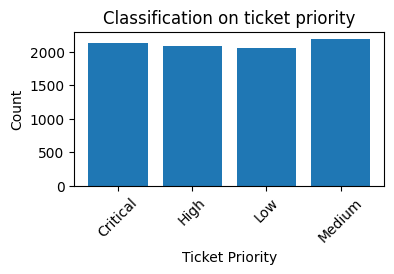

In [80]:
data=df.copy()
data=data.groupby('Ticket Priority')['Ticket ID'].count().reset_index()
data=data.rename(columns={'Ticket ID':'Count'})
print(data.head(10))

plt.figure(figsize=(4,2))
plt.bar(data['Ticket Priority'],data['Count'])
plt.xlabel('Ticket Priority')
plt.ylabel('Count')
plt.title('Classification on ticket priority')
plt.xticks(rotation=45)
plt.show()

# Classification based on Ticket Channel

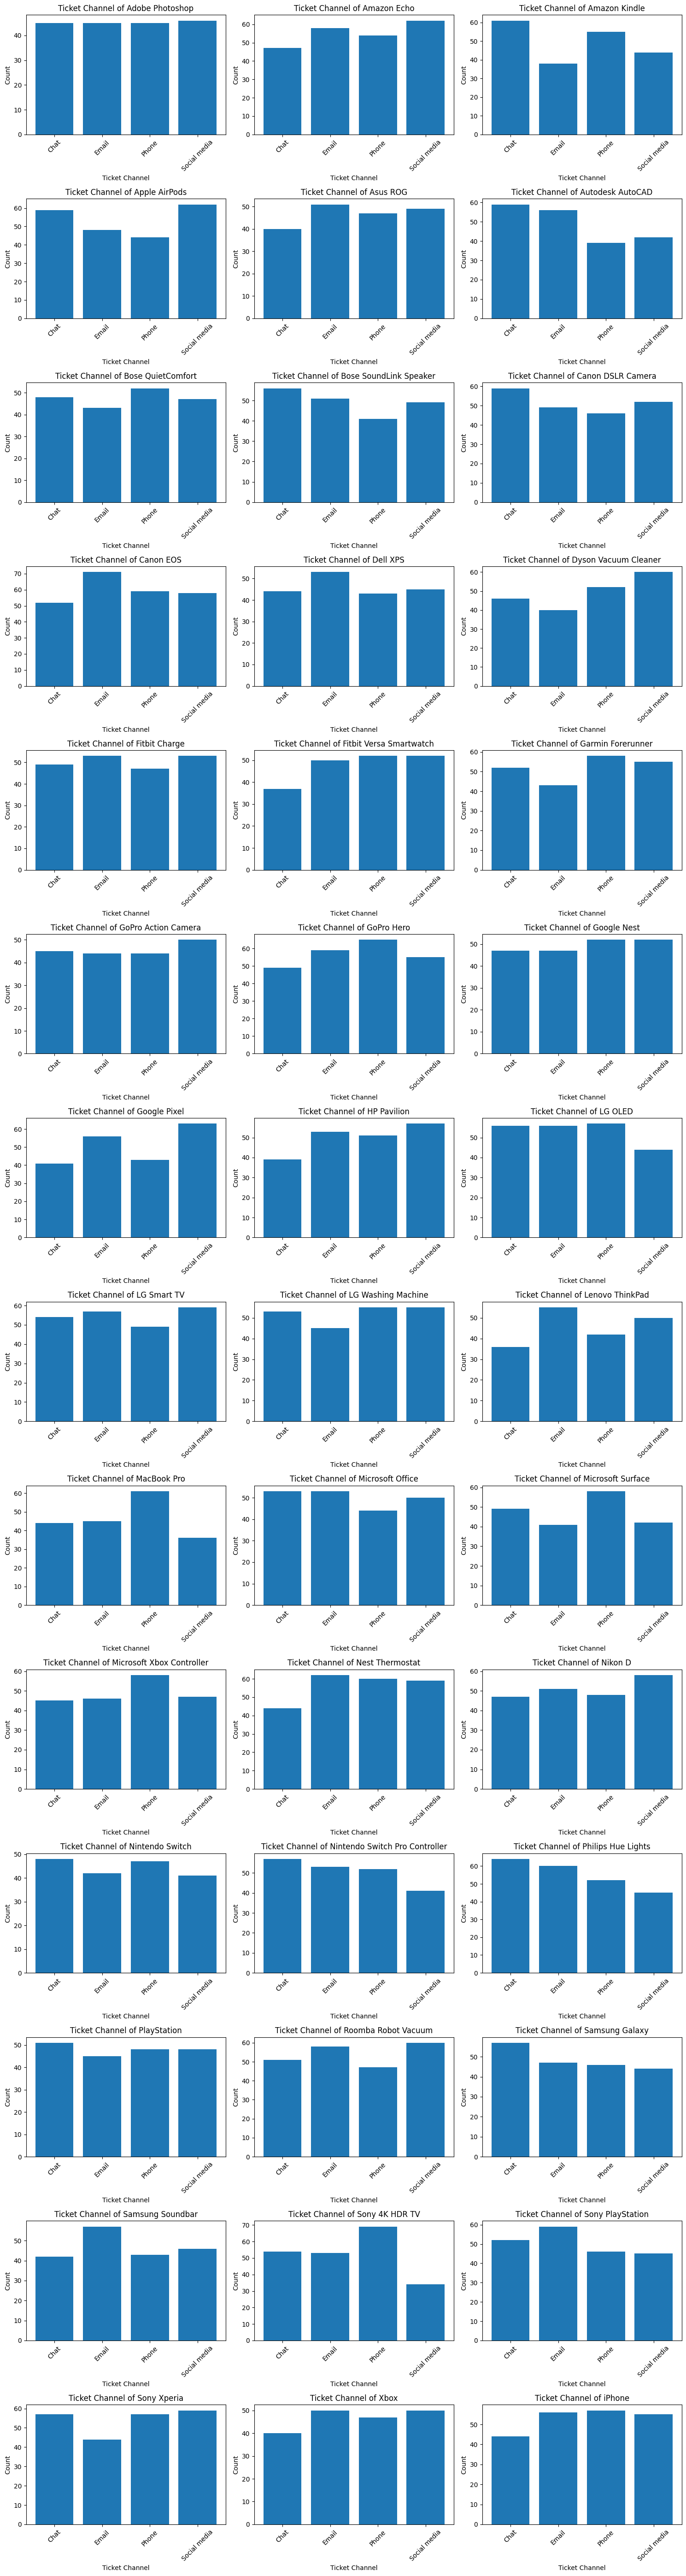

In [13]:
import math

data=df.copy()
data=data.groupby(['Product Purchased','Ticket Channel'])['Ticket ID'].count().reset_index()
prod=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(prod)/ncols)

fig,axes=plt.subplots(nrows,ncols,figsize=(15,4*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,product in enumerate(prod):
    ax=axes[i]
    d=data[data['Product Purchased']==product]
    ax.bar(d['Ticket Channel'],d['Ticket ID'])
    ax.set_xlabel('Ticket Channel')
    ax.set_ylabel('Count')
    ax.set_title(f"Ticket Channel of {product}")
    ax.tick_params(axis='x',rotation=45)

plt.tight_layout()
plt.show()



  Ticket Channel  Count
0           Chat   2073
1          Email   2143
2          Phone   2132
3   Social media   2121


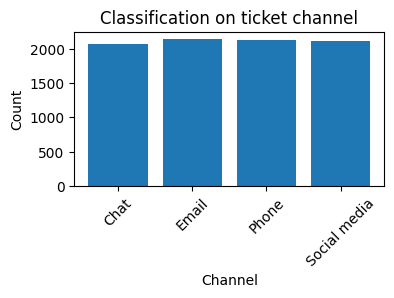

In [81]:
data=df.copy()
data=data.groupby('Ticket Channel')['Ticket ID'].count().reset_index()
data=data.rename(columns={'Ticket ID':'Count'})
print(data.head(10))

plt.figure(figsize=(4,2))
plt.bar(data['Ticket Channel'],data['Count'])
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Classification on ticket channel')
plt.xticks(rotation=45)
plt.show()

# Reason for missing values

In [83]:
data=df.copy()
m=data[data['Customer Satisfaction Rating'].isin(['Missing'])]
missing=m.groupby('Product Purchased')['Ticket ID'].count().reset_index()
missing=missing.rename(columns={'Ticket ID':'Missing in Rating'})

unresolved=data[data['Ticket Status'].isin(['Open','Pending Customer Response'])]
new=unresolved.groupby('Product Purchased')['Ticket ID'].count().reset_index()
new=new.rename(columns={'Ticket ID':'Unresolved Cases'})

dataf=pd.merge(new,missing,on='Product Purchased')
print(dataf)


                 Product Purchased  Unresolved Cases  Missing in Rating
0                  Adobe Photoshop               118                118
1                      Amazon Echo               149                149
2                    Amazon Kindle               132                132
3                    Apple AirPods               139                139
4                         Asus ROG               126                126
5                 Autodesk AutoCAD               132                132
6                Bose QuietComfort               122                122
7           Bose SoundLink Speaker               133                133
8                Canon DSLR Camera               125                125
9                        Canon EOS               157                157
10                        Dell XPS               137                137
11            Dyson Vacuum Cleaner               139                139
12                   Fitbit Charge               139            

# Classification based on Customer Rating

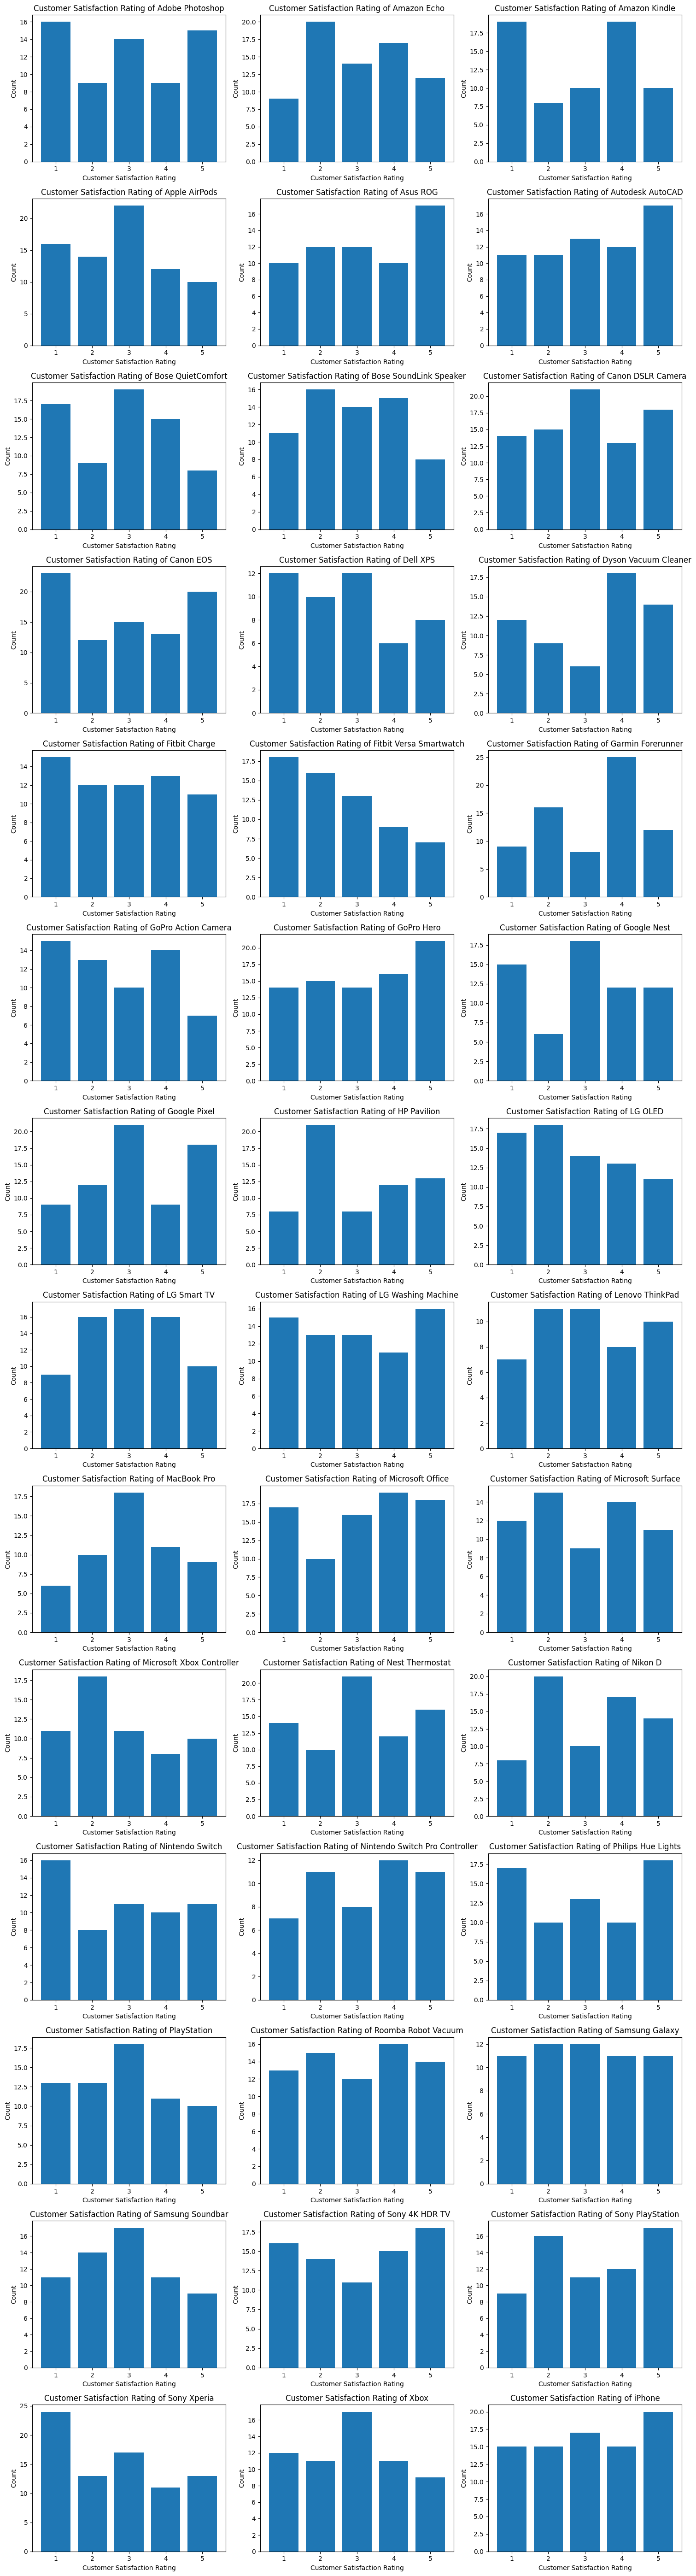

In [15]:
import math

data=df.copy()
data = data[data['Customer Satisfaction Rating'] != 'Missing']
data=data.groupby(['Product Purchased','Customer Satisfaction Rating'])['Ticket ID'].count().reset_index()
prod=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(prod)/ncols)

fig,axes=plt.subplots(nrows,ncols,figsize=(15,4*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,product in enumerate(prod):
    ax=axes[i]
    d=data[data['Product Purchased']==product]
    ax.bar(d['Customer Satisfaction Rating'],d['Ticket ID'])
    ax.set_xlabel('Customer Satisfaction Rating')
    ax.set_ylabel('Count')
    ax.set_title(f"Customer Satisfaction Rating of {product}")

plt.tight_layout()
plt.show()


   Customer Satisfaction Rating  Count
0                           1.0    553
1                           2.0    549
2                           3.0    580
3                           4.0    543
4                           5.0    544


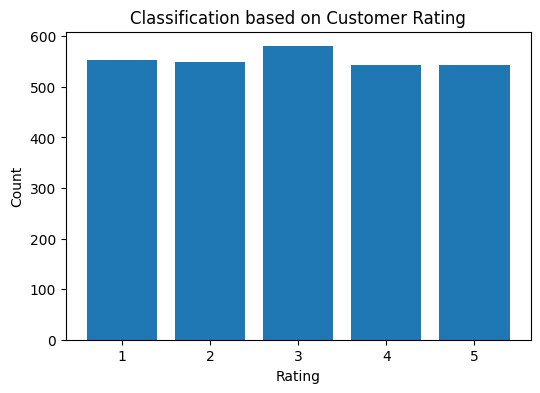

In [85]:
data=df.copy()
data=data[data['Customer Satisfaction Rating'] != 'Missing']
data=data.groupby('Customer Satisfaction Rating')['Ticket ID'].count().reset_index()
data=data.rename(columns={'Ticket ID':'Count'})
print(data.head(10))

plt.figure(figsize=(6,4))
plt.bar(data['Customer Satisfaction Rating'],data['Count'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Classification based on Customer Rating')
plt.xticks(rotation=0)
plt.show()

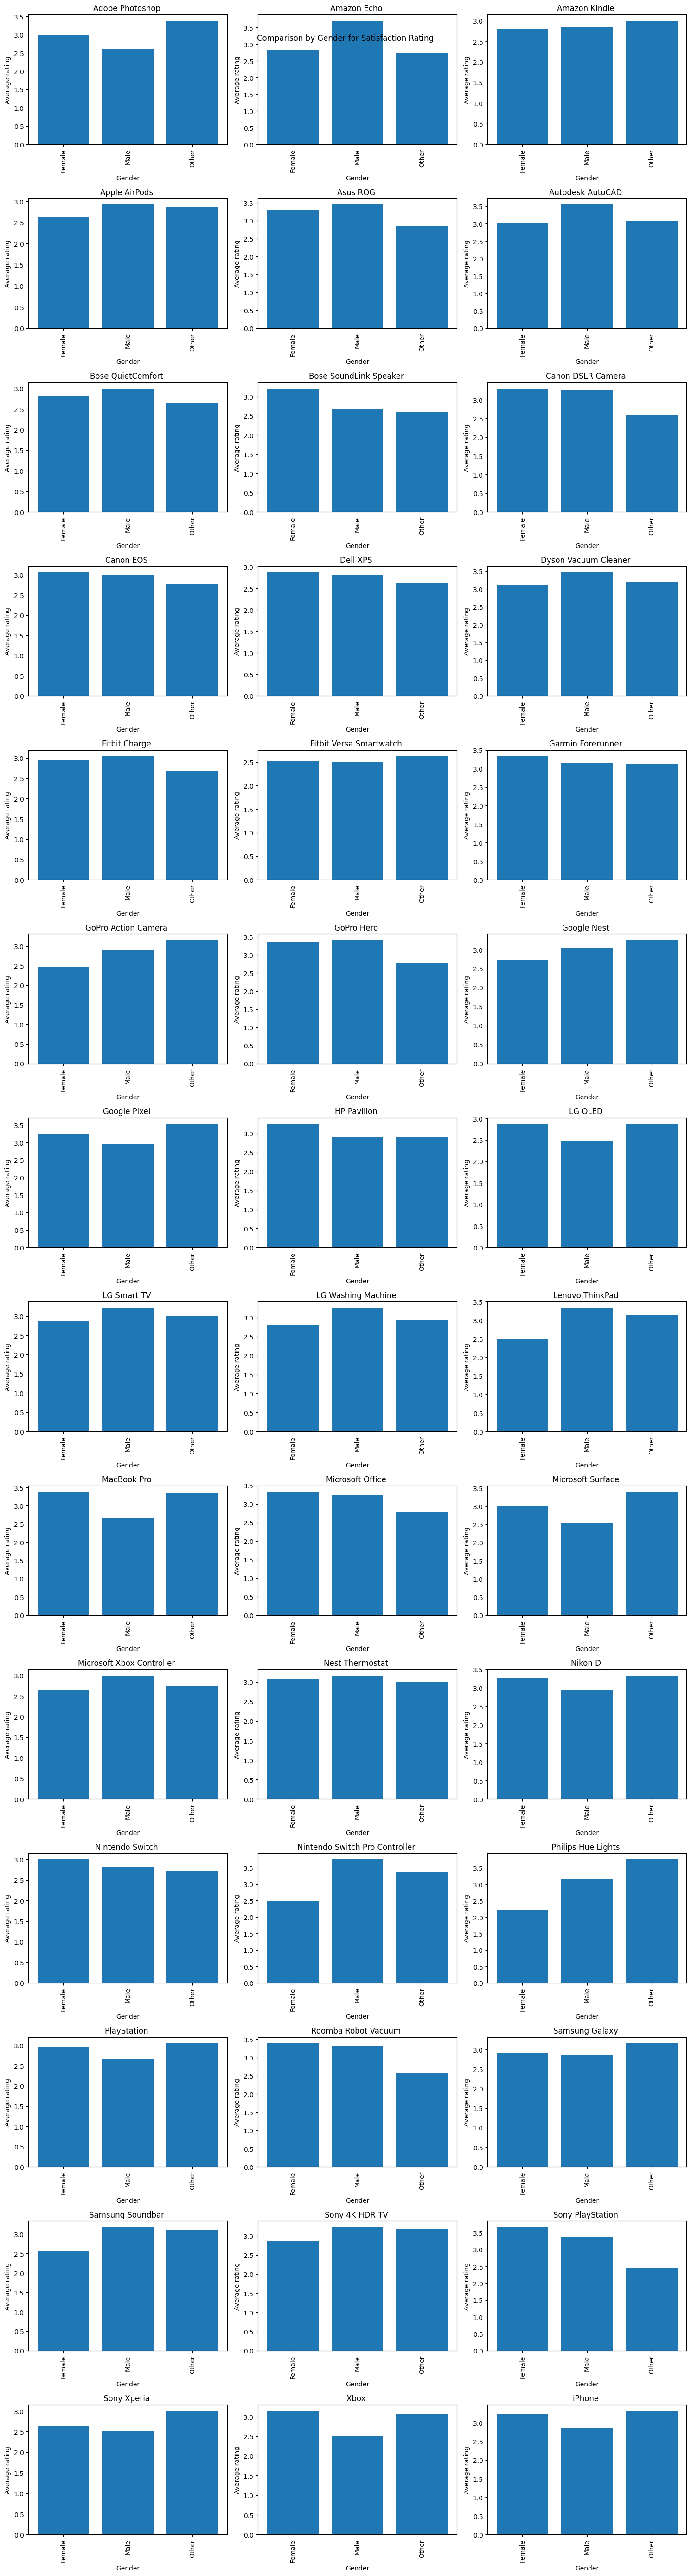

In [87]:
import math
data=df.copy()
data=data[data['Customer Satisfaction Rating']!='Missing']
data=data.groupby(['Product Purchased','Customer Gender'])['Customer Satisfaction Rating'].mean().reset_index()

product=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(product)/ncols)
fig,axes=plt.subplots(nrows,ncols,figsize=(15,4*nrows),sharey=False,sharex=False)
axes=axes.flatten()

for i,prod in enumerate(product):
    ax=axes[i]
    d=data[(data['Product Purchased']==prod)]
    ax.bar(d['Customer Gender'],d['Customer Satisfaction Rating'])
    ax.set_xlabel('Gender')
    ax.set_ylabel('Average rating')
    ax.set_title(f'{prod} ')
    ax.tick_params(axis='x',rotation=90)

fig.suptitle('Comparison by Gender for Satisfaction Rating')
plt.tight_layout()
plt.show()

# Classification based on Gender

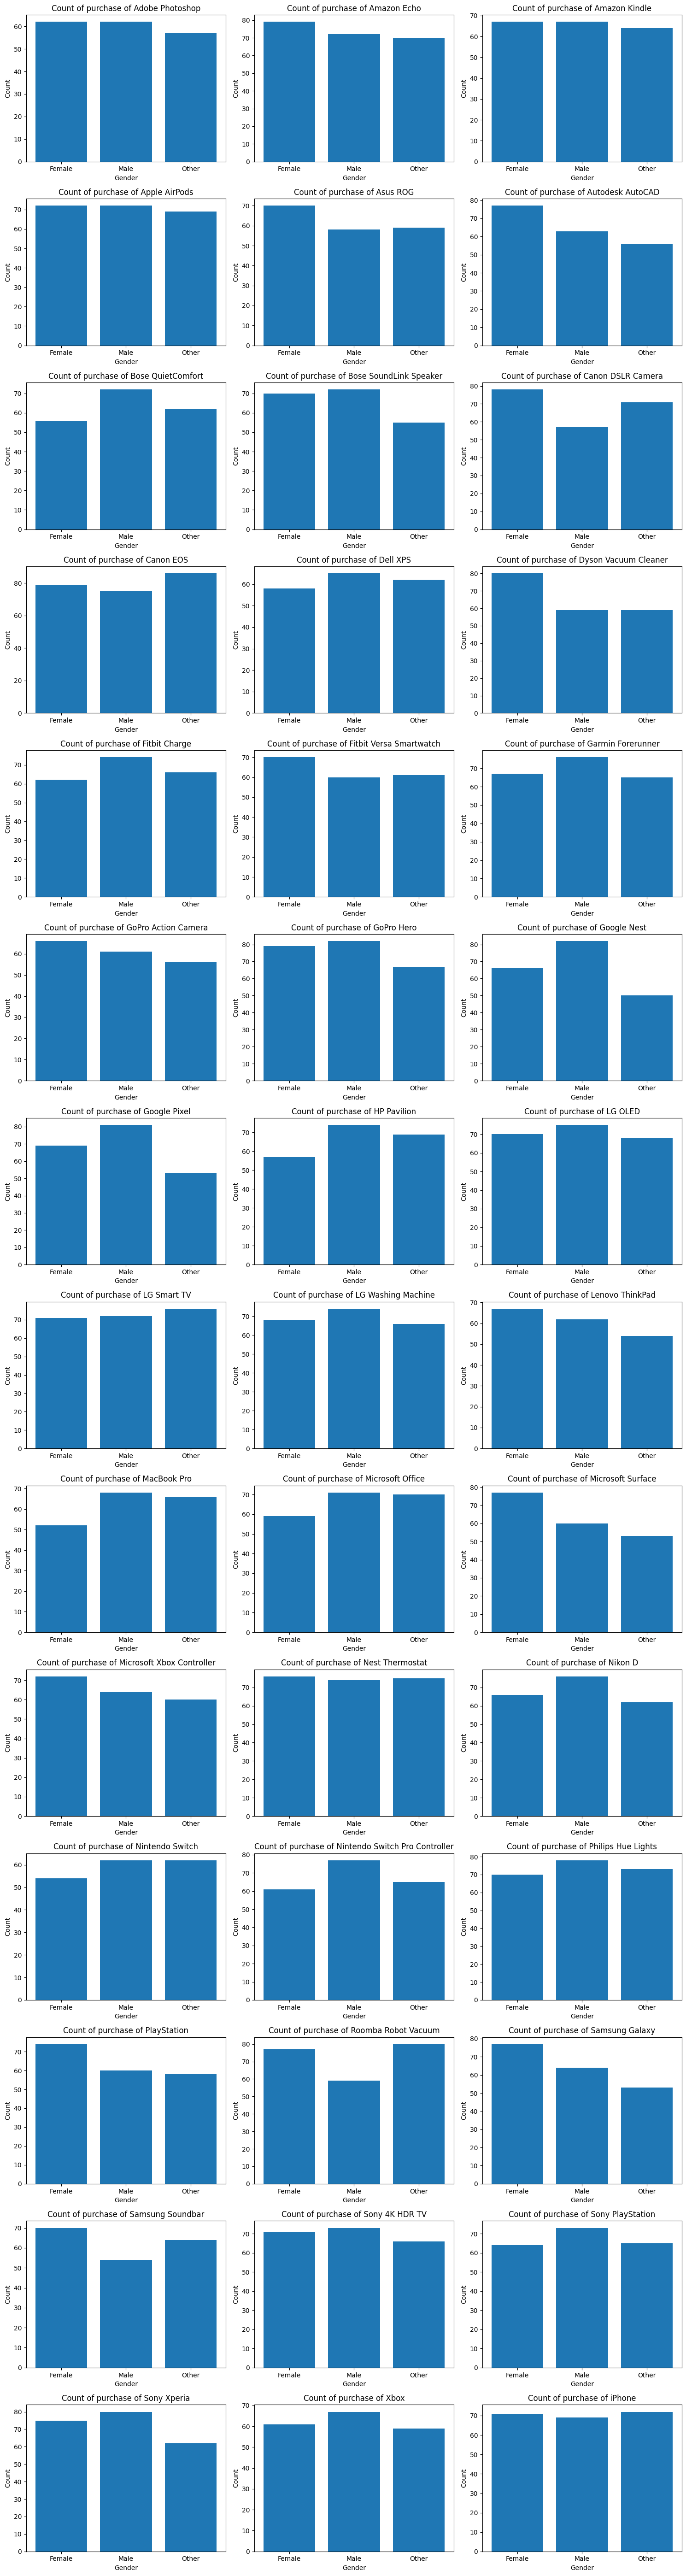

In [16]:
data=df.copy()
data=data.groupby(['Product Purchased','Customer Gender'])['Ticket ID'].count().reset_index()

prod=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(prod)/ncols)

fig,axes=plt.subplots(nrows,ncols,figsize=(15,4*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,product in enumerate(prod):
    ax=axes[i]
    d=data[data['Product Purchased']==product]
    ax.bar(d['Customer Gender'],d['Ticket ID'])
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')
    ax.set_title(f"Count of purchase of {product}")

plt.tight_layout()
plt.show()

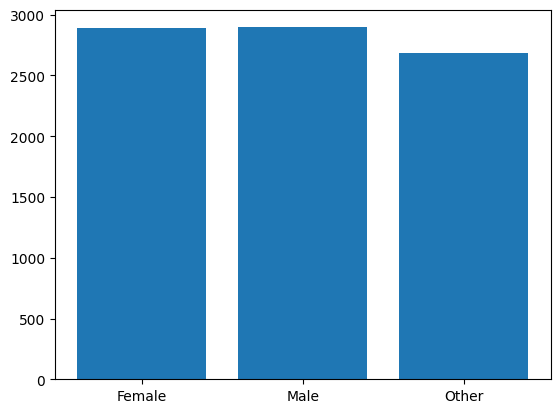

In [117]:
data=df.copy()
data=data.groupby(['Customer Gender'])['Ticket ID'].count().reset_index()

plt.bar(data['Customer Gender'],data['Ticket ID'])
plt.show()


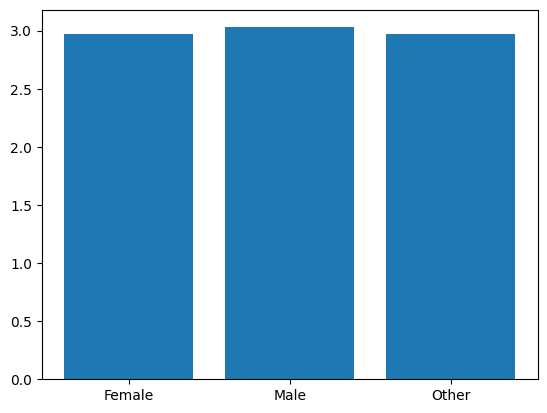

In [88]:
data=df.copy()
data=data[data['Customer Satisfaction Rating']!='Missing']
data=data.groupby(['Customer Gender'])['Customer Satisfaction Rating'].mean().reset_index()

plt.bar(data['Customer Gender'],data['Customer Satisfaction Rating'])
plt.show()

# Classification on Customer age

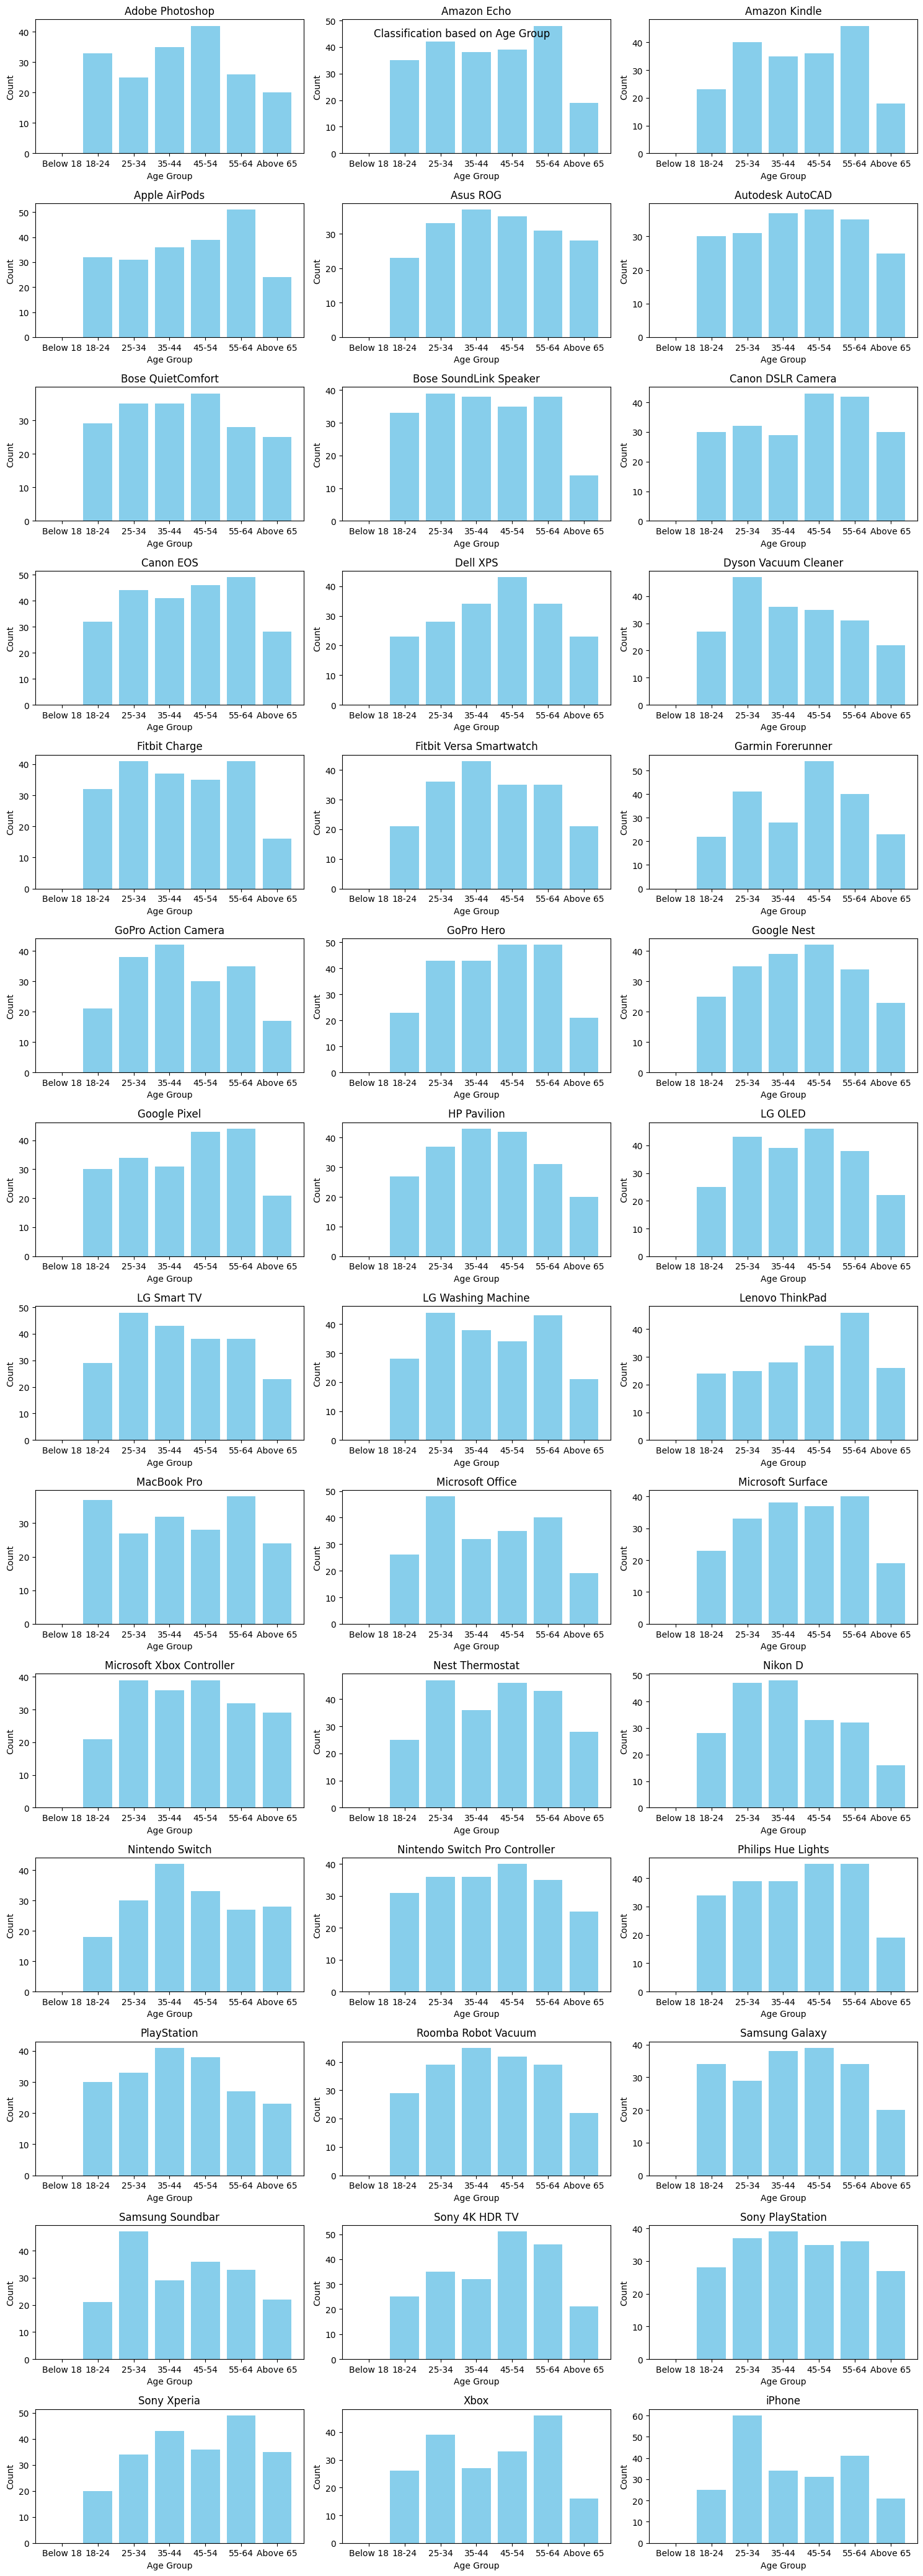

In [17]:
data=df.copy()
bin=[0, 18, 25, 35, 45, 55, 65,np.inf]
label=['Below 18','18-24', '25-34', '35-44', '45-54', '55-64','Above 65']
data['Age Group']=pd.cut(data['Customer Age'],bins=bin,labels=label,right=False)
data=data.groupby(['Product Purchased','Age Group'])['Ticket ID'].count().reset_index()

prod=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(prod)/ncols)
fig,axes=plt.subplots(nrows,ncols,figsize=(15,3*nrows),sharex=False,sharey=False)
axes=axes.flatten()

for i,product in enumerate(prod):
    ax=axes[i]
    d=data[data['Product Purchased']==product]
    ax.bar(d['Age Group'],d['Ticket ID'],color='skyblue')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Count')
    ax.set_title(f"{product}")

fig.suptitle('Classification based on Age Group')
plt.tight_layout()
plt.show()

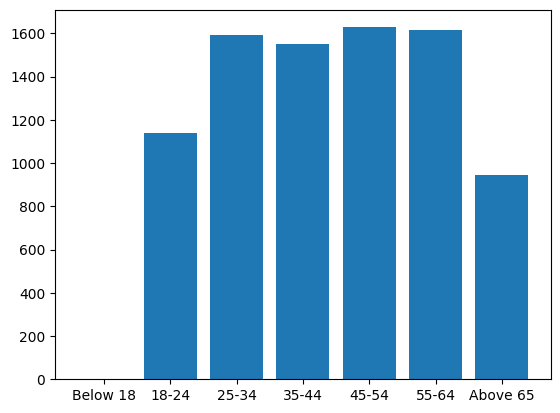

In [116]:
data=df.copy()
bin=[0, 18, 25, 35, 45, 55, 65,np.inf]
label=['Below 18','18-24', '25-34', '35-44', '45-54', '55-64','Above 65']
data['Age Group']=pd.cut(data['Customer Age'],bins=bin,labels=label,right=False)
data=data.groupby(['Age Group'])['Ticket ID'].count().reset_index()

plt.bar(data['Age Group'],data['Ticket ID'])
plt.show()


# Classification on Ticket Type

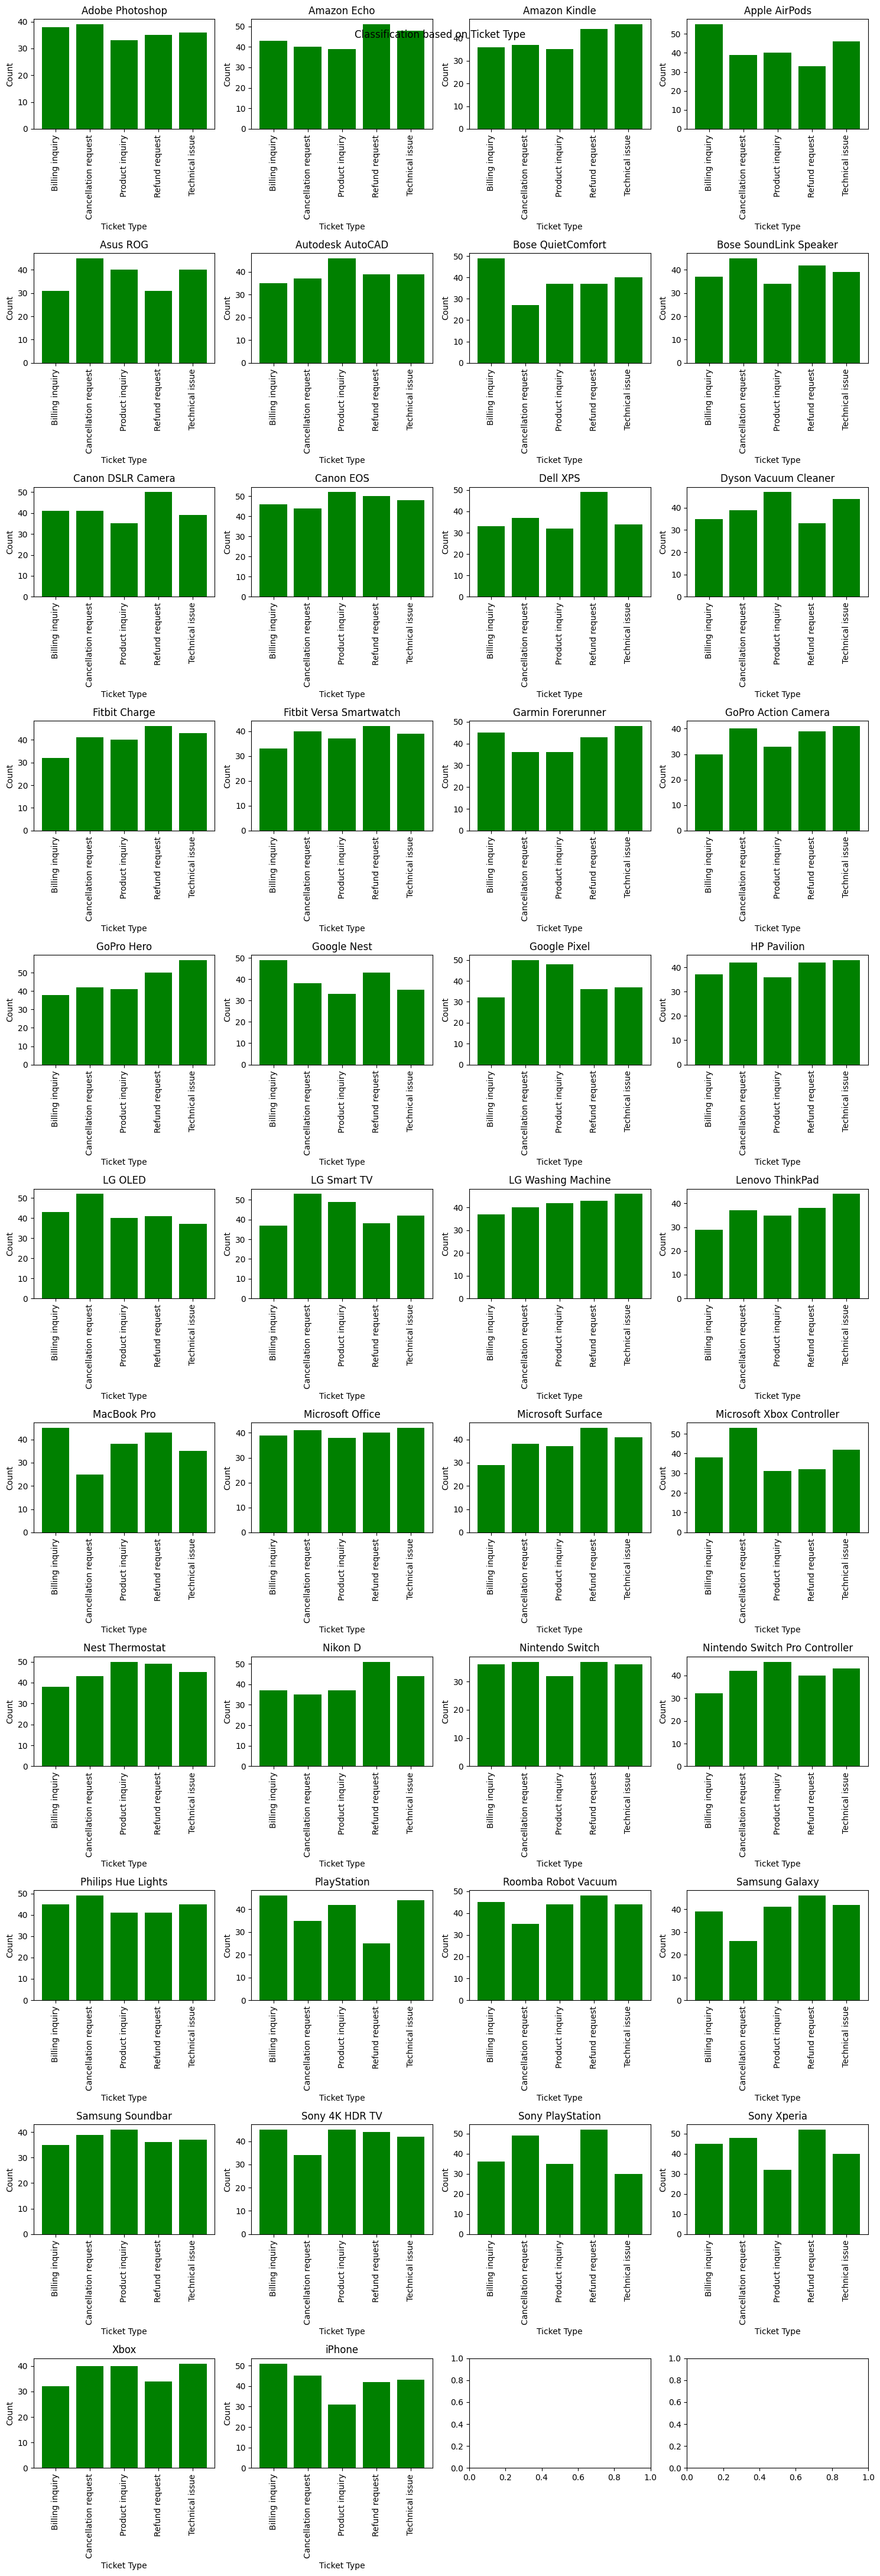

In [18]:
data=df.copy()
data=data.groupby(['Product Purchased','Ticket Type'])['Ticket ID'].count().reset_index()

product=data['Product Purchased'].unique()
ncols=4
nrows=math.ceil(len(product)/ncols)
fig,axes=plt.subplots(nrows,ncols,figsize=(15,4*nrows),sharey=False,sharex=False)
axes=axes.flatten()

for i,prod in enumerate(product):
    ax=axes[i]
    d=data[data['Product Purchased']==prod]
    ax.bar(d['Ticket Type'],d['Ticket ID'],color='green')
    ax.set_xlabel('Ticket Type')
    ax.set_ylabel('Count')
    ax.set_title(f"{prod}")
    ax.tick_params(axis='x',rotation=90)

fig.suptitle('Classification based on Ticket Type')
plt.tight_layout()
plt.show()

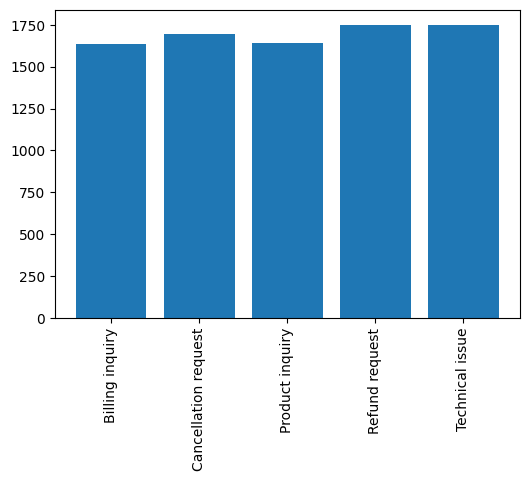

In [91]:
data=df.copy()
data=data.groupby(['Ticket Type'])['Ticket ID'].count().reset_index()

plt.figure(figsize=(6,4))
plt.bar(data['Ticket Type'],data['Ticket ID'])
plt.xticks(rotation=90)
plt.show()

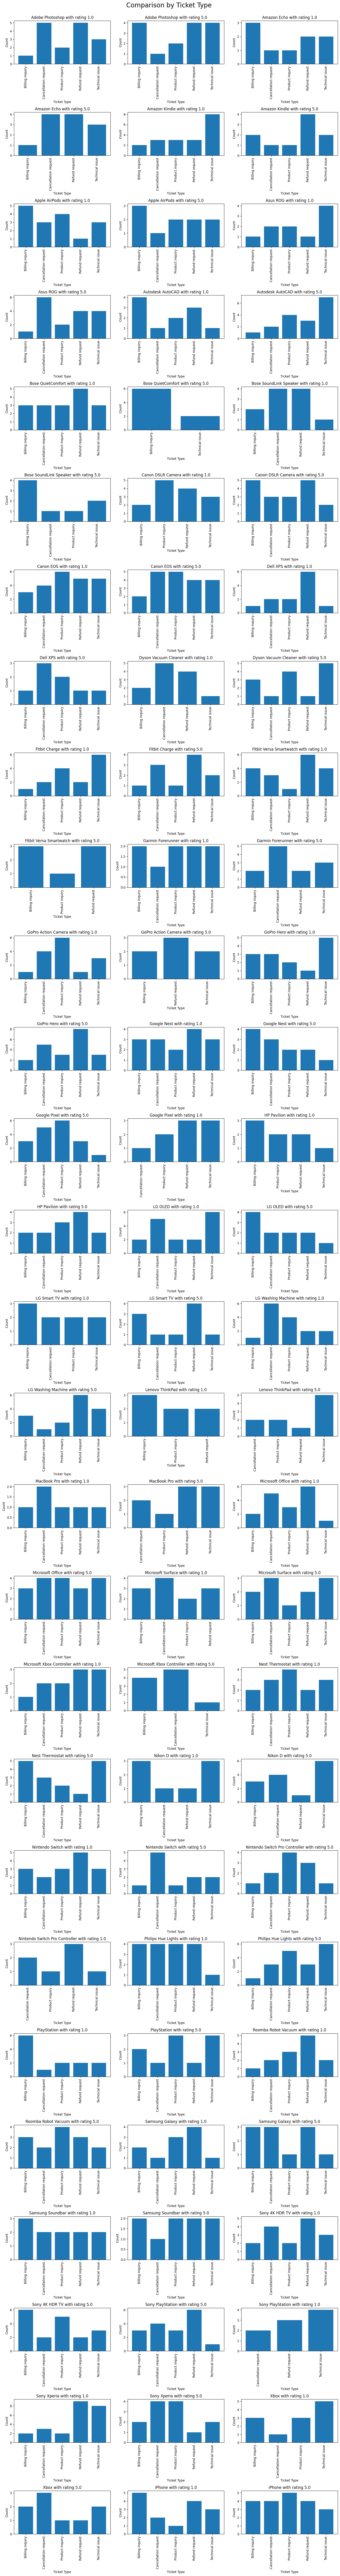

In [29]:
data=df.copy()
data=data.groupby(['Product Purchased','Ticket Type','Customer Satisfaction Rating'])['Ticket ID'].count().reset_index()

product=data[data['Customer Satisfaction Rating'].isin([1,5])][['Product Purchased','Customer Satisfaction Rating']].drop_duplicates().values
ncols=3
nrows=math.ceil(len(product)/ncols)
fig,axes=plt.subplots(nrows,ncols,figsize=(15,4*nrows),sharey=False,sharex=False)
axes=axes.flatten()

for i,(prod,y) in enumerate(product):
    ax=axes[i]
    d=data[(data['Product Purchased']==prod) & (data['Customer Satisfaction Rating']==y)]
    ax.bar(d['Ticket Type'],d['Ticket ID'])
    ax.set_xlabel('Ticket Type')
    ax.set_ylabel('Count')
    ax.set_title(f'{prod} with rating {y}')
    ax.tick_params(axis='x',rotation=90)

fig.suptitle('Comparison by Ticket Type', fontsize=20, y=1.00)
plt.tight_layout()
plt.show()


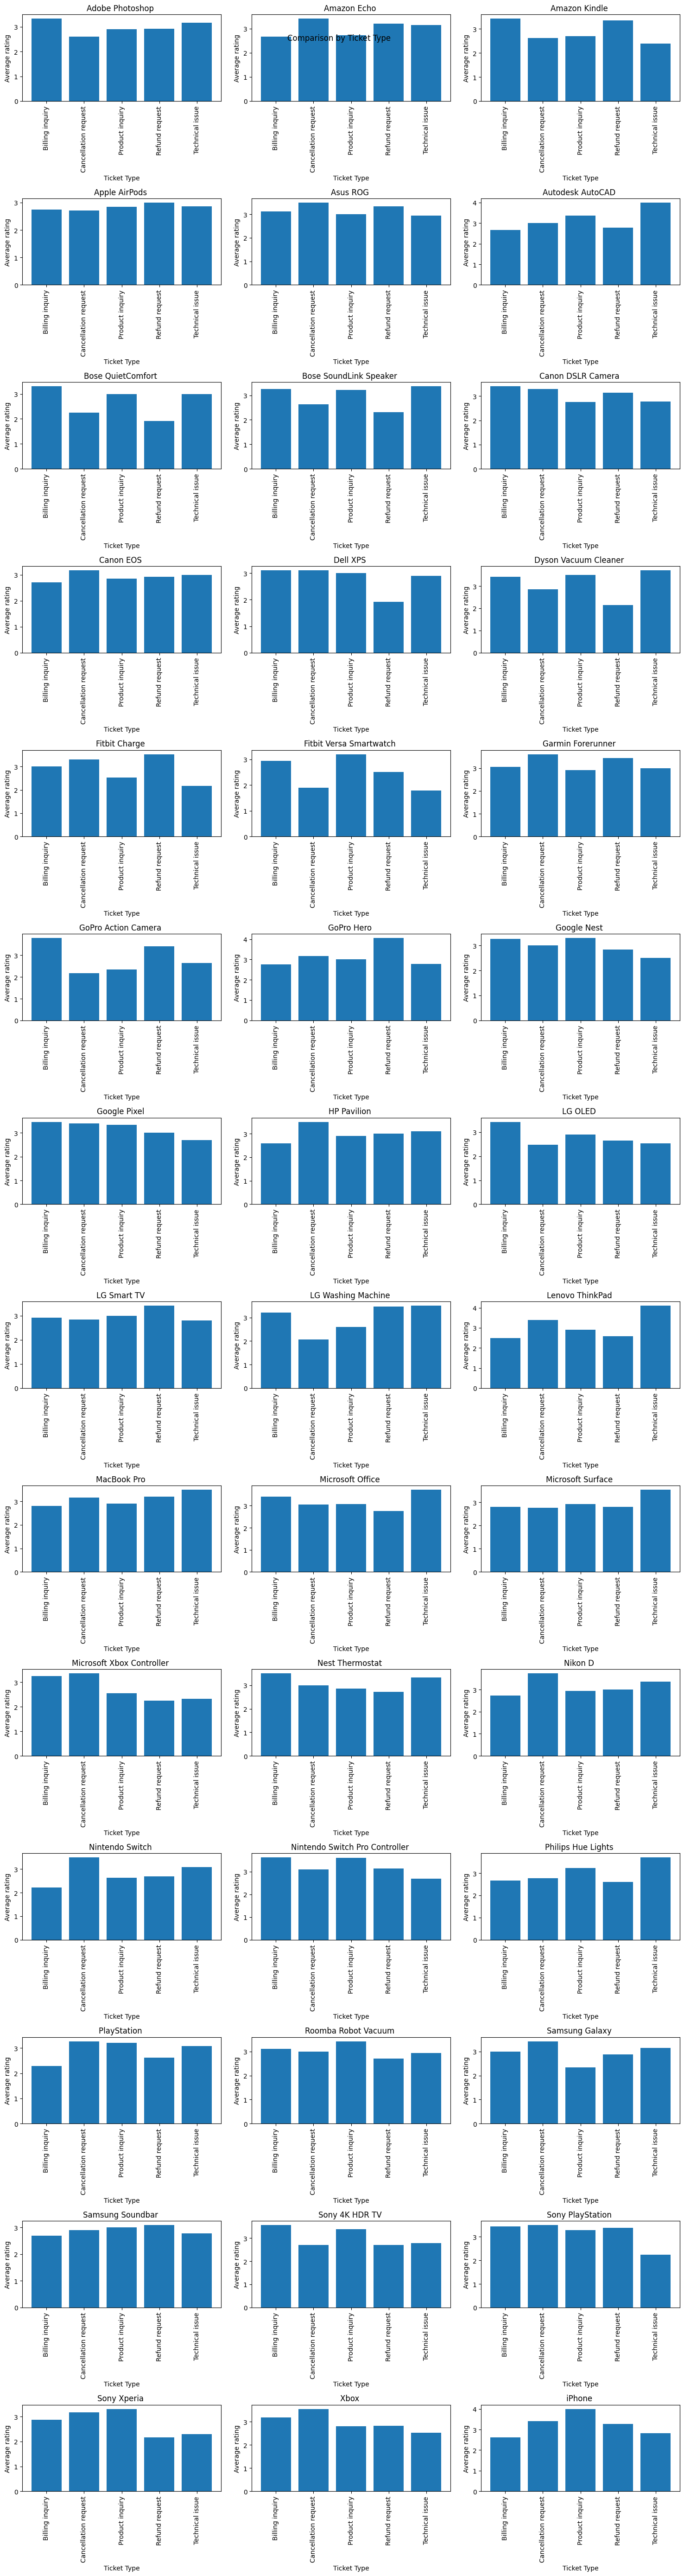

In [20]:
data=df.copy()
data=data[data['Customer Satisfaction Rating']!='Missing']
data=data.groupby(['Product Purchased','Ticket Type'])['Customer Satisfaction Rating'].mean().reset_index()

product=data['Product Purchased'].unique()
ncols=3
nrows=math.ceil(len(product)/ncols)
fig,axes=plt.subplots(nrows,ncols,figsize=(15,4*nrows),sharey=False,sharex=False)
axes=axes.flatten()

for i,prod in enumerate(product):
    ax=axes[i]
    d=data[(data['Product Purchased']==prod)]
    ax.bar(d['Ticket Type'],d['Customer Satisfaction Rating'])
    ax.set_xlabel('Ticket Type')
    ax.set_ylabel('Average rating')
    ax.set_title(f'{prod} ')
    ax.tick_params(axis='x',rotation=90)

fig.suptitle('Comparison by Ticket Type')
plt.tight_layout()
plt.show()


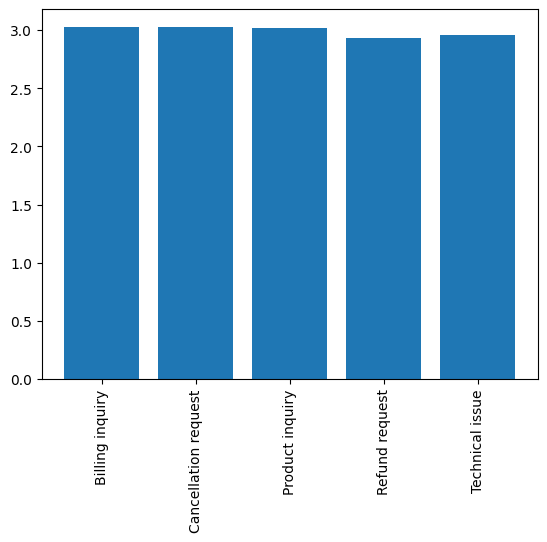

In [114]:
data=df.copy()
data=data[data['Customer Satisfaction Rating']!='Missing']
data=data.groupby(['Ticket Type'])['Customer Satisfaction Rating'].mean().reset_index()

plt.bar(data['Ticket Type'],data['Customer Satisfaction Rating'])
plt.xticks(rotation=90)
plt.show()

# Top 5 issues of each product

In [32]:
data=df.copy()

for i in data['Product Purchased'].unique():
    d=data[data['Product Purchased']==i]
    d=d['Ticket Subject'].value_counts().head(5)
    print(f'Common Issues of {i}')
    print(d)

Common Issues of GoPro Hero
Refund request           28
Product compatibility    18
Installation support     17
Payment issue            16
Product setup            15
Name: Ticket Subject, dtype: int64
Common Issues of LG Smart TV
Battery life                18
Peripheral compatibility    17
Cancellation request        16
Software bug                16
Data loss                   15
Name: Ticket Subject, dtype: int64
Common Issues of Dell XPS
Refund request            18
Cancellation request      15
Network problem           14
Software bug              13
Product recommendation    13
Name: Ticket Subject, dtype: int64
Common Issues of Microsoft Office
Product recommendation    19
Network problem           18
Product compatibility     17
Display issue             16
Installation support      15
Name: Ticket Subject, dtype: int64
Common Issues of Autodesk AutoCAD
Peripheral compatibility    17
Software bug                16
Battery life                16
Data loss                   15


# Top 10 common issues

In [33]:
common_issues = data['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)

Top 10 Common Issues:
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: Ticket Subject, dtype: int64


# Customer contacted and issues

In [102]:
data=df.copy() 
common_issues = data['Customer Name'].value_counts().head(3)
print("Top 3 :")
print(common_issues)

Top 3 :
Michael Garcia    5
James Smith       5
Michael White     4
Name: Customer Name, dtype: int64


In [103]:
data=data[data['Customer Name'].isin(common_issues.index)]
for i in common_issues.index:
    d=data[data['Customer Name']==i]
    print(f"Issues reported by {i}:")
    print(d['Ticket Subject'])

Issues reported by Michael Garcia:
788       Product recommendation
836                 Battery life
1054    Peripheral compatibility
1600                Battery life
3356       Product compatibility
Name: Ticket Subject, dtype: object
Issues reported by James Smith:
1138          Network problem
1739            Payment issue
4830            Product setup
4994    Product compatibility
7497         Delivery problem
Name: Ticket Subject, dtype: object
Issues reported by Michael White:
5512        Battery life
6252        Software bug
8090    Delivery problem
8142    Delivery problem
Name: Ticket Subject, dtype: object


# Monthly purchase

  Month of Purchase  Ticket ID
0           2020-01        377
1           2020-02        376
2           2020-03        324
3           2020-04        354
4           2020-05        322


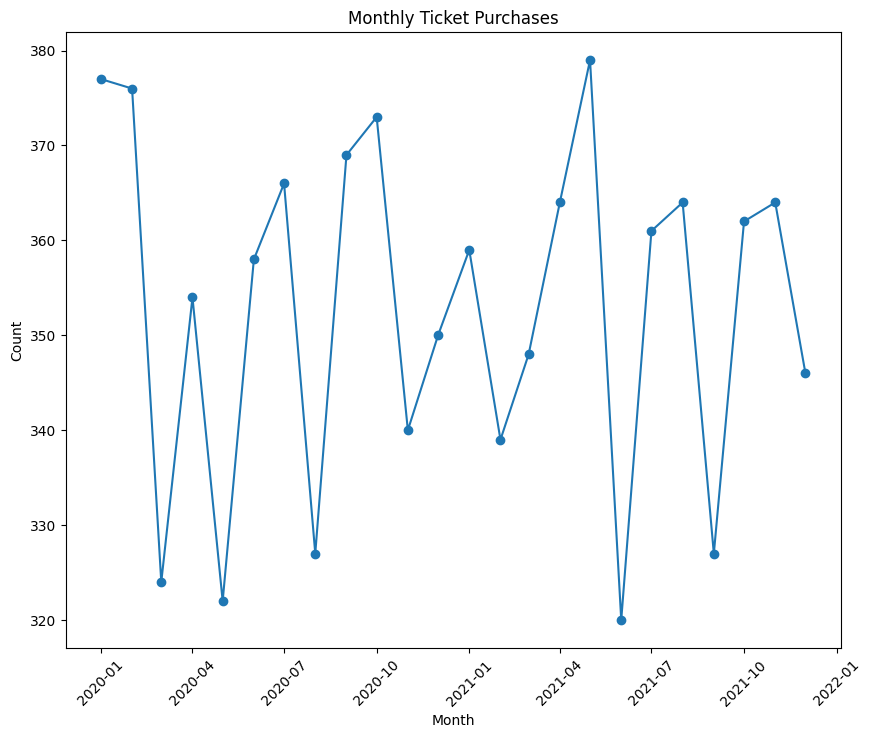

In [120]:
data=df.copy()
data['Month of Purchase']=pd.to_datetime(data['Date of Purchase']).dt.to_period('M')
data=data.groupby('Month of Purchase')['Ticket ID'].count().reset_index()
print(data.head(5))

data['Month of Purchase'] = data['Month of Purchase'].dt.to_timestamp()

plt.figure(figsize=(10,8))
plt.plot(data['Month of Purchase'],data['Ticket ID'],marker='o')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Monthly Ticket Purchases')
plt.show()

Month of Purchase
2020-01-01    377
2020-02-01    376
2020-03-01    324
2020-04-01    354
2020-05-01    322
Name: Ticket ID, dtype: int64


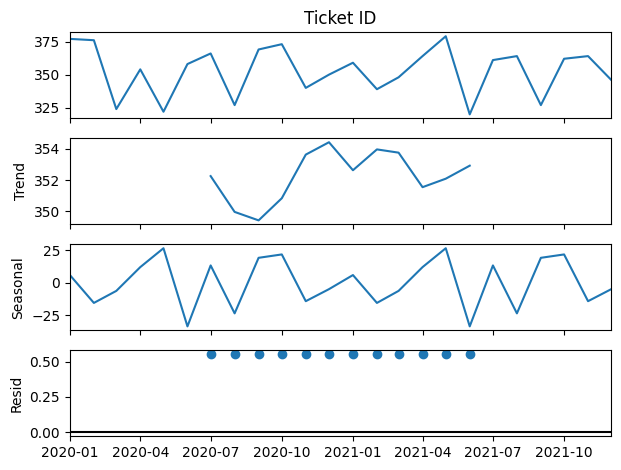

ADF Statistic: -4.358749570723357
p-value: 0.0003509080171921243
Critical Values:
   1%: -3.964
   5%: -3.085
   10%: -2.682
✅ Reject the null hypothesis — the series is stationary.


In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
d=data.set_index('Month of Purchase')['Ticket ID']
d.index = pd.to_datetime(d.index)
print(d.head(5))
result=seasonal_decompose(d,model='additive',period=12)
result.plot()
plt.show()

a=adfuller(d)
print('ADF Statistic:', a[0])
print('p-value:', a[1])
print('Critical Values:')
for key, value in a[4].items():
    print(f'   {key}: {value:.3f}')

if a[1] <= 0.05:
    print("✅ Reject the null hypothesis — the series is stationary.")
else:
    print("❌ Fail to reject the null — the series is non-stationary.")

In [122]:
from pmdarima import auto_arima

train_size=int(.8*len(d))
train,test=d.iloc[:train_size],d.iloc[train_size:]

arm=auto_arima(train,seasonal=True,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
print(arm.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=169.697, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=170.174, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=278.894, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=168.377, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=171.035, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=167.670, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=181.011, Time=0.30 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 3.196 seconds
                               SARIMAX Results             

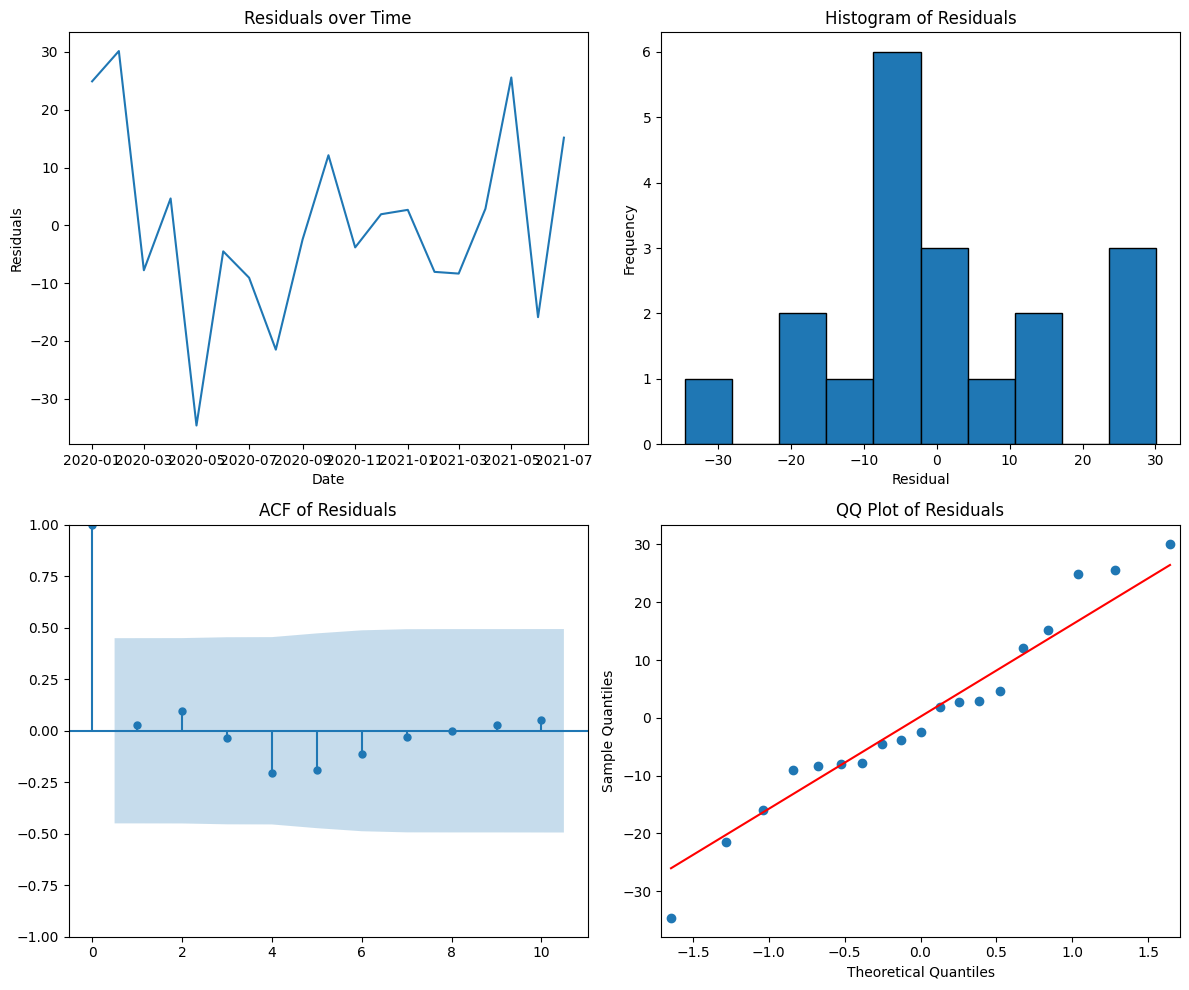

In [123]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot

# Get residuals from auto_arima model
residuals = pd.Series(arm.resid(), index=train.index)

plt.figure(figsize=(12,10))

# 1. Residuals over time
plt.subplot(2,2,1)
plt.plot(residuals)
plt.title('Residuals over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')

# 2. Histogram of residuals
plt.subplot(2,2,2)
plt.hist(residuals, bins=10, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')

# 3. ACF of residuals
plt.subplot(2,2,3)
plot_acf(residuals, lags=10, ax=plt.gca())
plt.title('ACF of Residuals')

# 4. QQ plot
plt.subplot(2,2,4)
qqplot(residuals, line='s', ax=plt.gca())
plt.title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()


RMSE :  8.850856700850647
MAPE :  0.020192158549696387


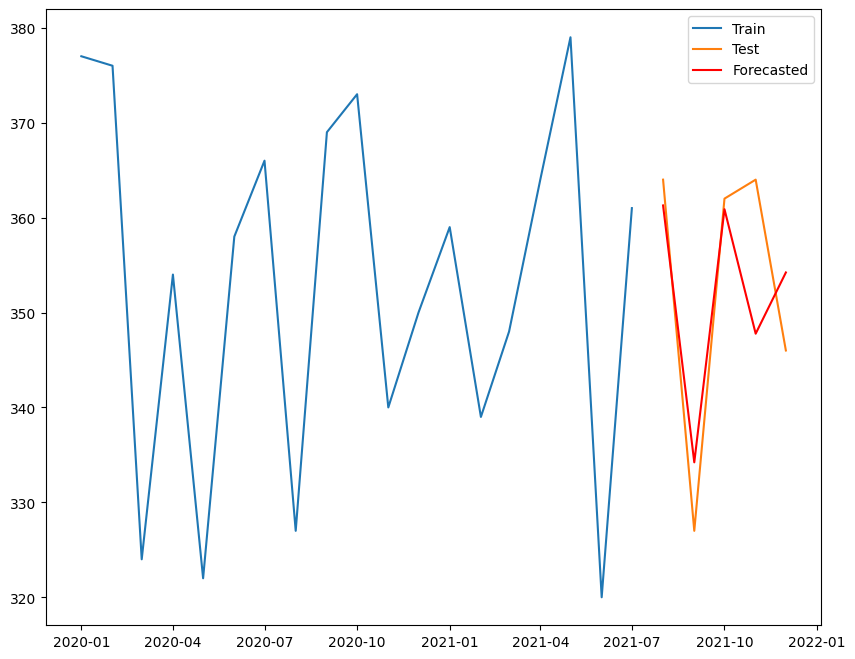

In [124]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
n=len(test)
forecast=arm.predict(n_periods=n)

forecast_df=pd.Series(forecast,index=test.index)

mape=mean_absolute_percentage_error(test,forecast)
rmse=np.sqrt(mean_squared_error(test,forecast))
print('RMSE : ',rmse)
print('MAPE : ',mape)

plt.figure(figsize=(10,8))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(forecast_df,label='Forecasted',color='red')
plt.legend()
plt.show()


In [133]:
arm_full = auto_arima(d, seasonal=False,
                      trace=True, error_action='ignore',
                      suppress_warnings=True, stepwise=True)

last_date=d.index.max() 
print(last_date)
n_month=4 
future_month=pd.date_range(start=last_date+pd.DateOffset(months=1),periods=n_month,freq='M') 

new_forecasted=arm_full.predict(n_periods=n_month)
print(new_forecasted) 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=351.746, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=211.125, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=210.977, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=206.941, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=208.833, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=209.140, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=205.928, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=210.079, Time=0.45 sec

Best mode

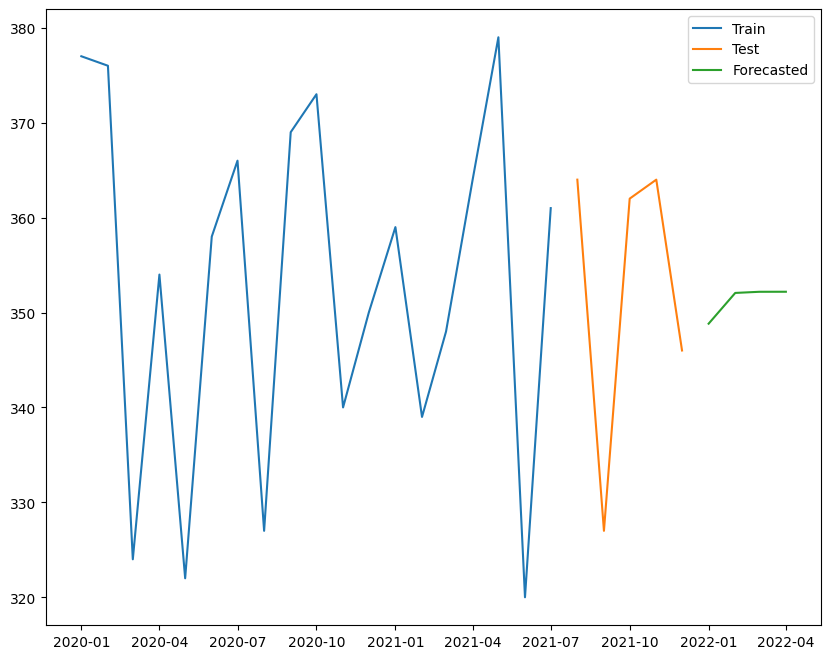

In [134]:
plt.figure(figsize=(10,8))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(new_forecasted,label='Forecasted')
plt.legend()
plt.show()

# Difference between First response time and Time to resolution

In [93]:
data=df.copy()
data=data[data['Time to Resolution']!='Missing']
data['Time to Resolution']=pd.to_datetime(data['Time to Resolution'])
data['First Response Time']=pd.to_datetime(data['First Response Time'])


diff=data['Time to Resolution']-data['First Response Time']
data['Response Time (in hours)']=diff.dt.total_seconds()/3600
print(data[['Time to Resolution','First Response Time','Response Time (in hours)']].head(5))


    Time to Resolution First Response Time  Response Time (in hours)
2  2023-06-01 18:05:38 2023-06-01 11:14:38                  6.850000
3  2023-06-01 01:57:40 2023-06-01 07:29:40                 -5.533333
4  2023-06-01 19:53:42 2023-06-01 00:12:42                 19.683333
10 2023-05-31 23:51:49 2023-06-01 17:46:49                -17.916667
11 2023-06-01 09:27:51 2023-06-01 12:05:51                 -2.633333


# Correlation between Response time and Customer Satisfaction Rating

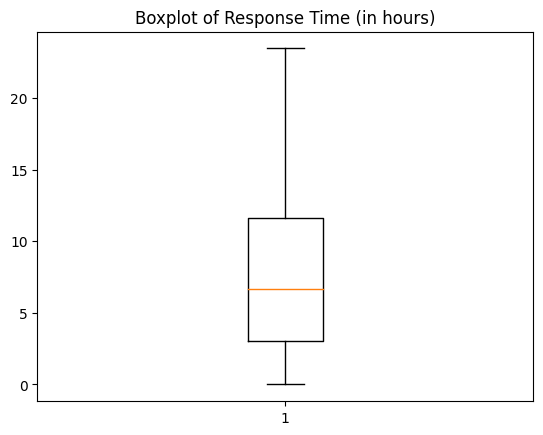

Correlation between Response Time and Customer Satisfaction Rating :  0.005293085550544598 
 P-Value :  0.7807013510732843


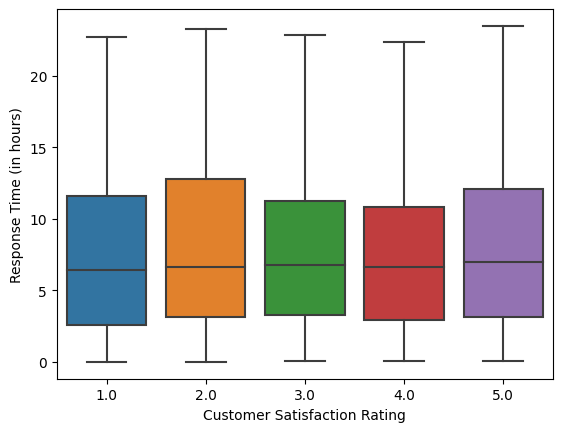

In [94]:

from scipy.stats import spearmanr

data=data[data['Customer Satisfaction Rating']!='Missing']
data['Response Time (in hours)']=pd.to_numeric(data['Response Time (in hours)'], errors='coerce')
data['Response Time (in hours)']=data['Response Time (in hours)'].abs()

plt.boxplot(data['Response Time (in hours)'])
plt.title('Boxplot of Response Time (in hours)')
plt.show()

import seaborn as sns
sns.boxplot(x='Customer Satisfaction Rating', y='Response Time (in hours)', data=data)


cor, p_value = spearmanr(data['Response Time (in hours)'], data['Customer Satisfaction Rating'])

print('Correlation between Response Time and Customer Satisfaction Rating : ',cor,'\n P-Value : ',p_value)

# Random Forest Classifier 

In [95]:
data=df.copy()

categorical_feature=[feature for feature in data.columns if data[feature].dtypes=='object']
numerical_feature=[feature for feature in data.columns if data[feature].dtypes!='object']
print(categorical_feature)
print(numerical_feature)

categorical_feature.remove('Date of Purchase')
categorical_feature.remove('First Response Time')
categorical_feature.remove('Time to Resolution')
categorical_feature.remove('Customer Name')
categorical_feature.remove('Customer Email')
categorical_feature.remove('Ticket Description')
categorical_feature.remove('Resolution')
categorical_feature.remove('Customer Satisfaction Rating')
numerical_feature.remove('Ticket ID')

print(categorical_feature)
print(numerical_feature)

['Customer Name', 'Customer Email', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']
['Ticket ID', 'Customer Age']
['Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject', 'Ticket Status', 'Ticket Priority', 'Ticket Channel']
['Customer Age']


c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 

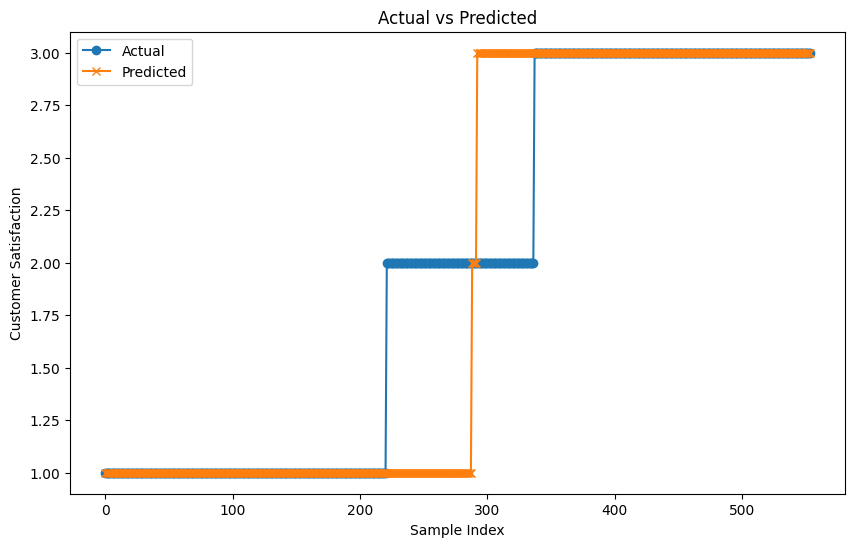

Accuracy :  0.40613718411552346
Confusion Matrix:  [[115   0 106]
 [ 66   2  48]
 [107   2 108]]
Classification Report:                precision    recall  f1-score   support

           1       0.40      0.52      0.45       221
           2       0.50      0.02      0.03       116
           3       0.41      0.50      0.45       217

    accuracy                           0.41       554
   macro avg       0.44      0.35      0.31       554
weighted avg       0.43      0.41      0.36       554

Response_Time_in_hours_        0.105591
Customer_Age                   0.095173
Day_of_Purchase                0.089405
Month_of_Purchase              0.072574
Day_of_Week_of_Purchase        0.060845
Customer_Gender_Other          0.019713
Customer_Gender_Male           0.018253
Ticket_Channel_Phone           0.018119
Ticket_Channel_Social_media    0.016983
Ticket_Type_Technical_issue    0.016799
dtype: float64


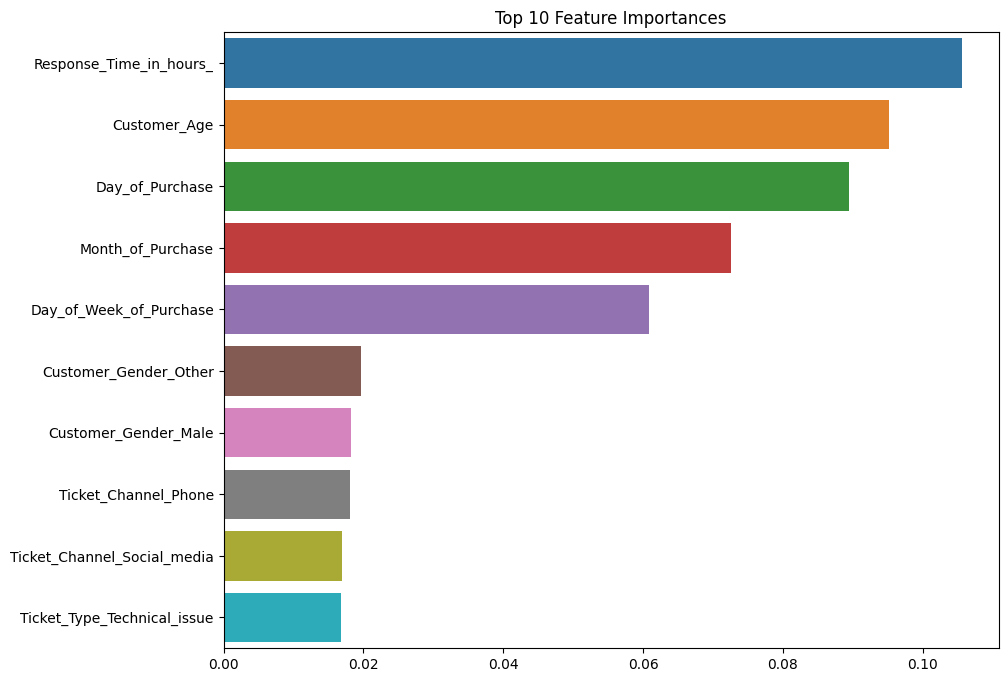

In [67]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data=df.copy()
data=data[data['Customer Satisfaction Rating']!='Missing']
data=data[data['Time to Resolution']!='Missing']
data['Time to Resolution']=pd.to_datetime(data['Time to Resolution'])
data['First Response Time']=pd.to_datetime(data['First Response Time'])
data.drop('Ticket ID', axis=1, inplace=True)

diff=data['Time to Resolution']-data['First Response Time']
data['Response Time (in hours)']=diff.dt.total_seconds()/3600

data['Response Time (in hours)']=pd.to_numeric(data['Response Time (in hours)'], errors='coerce')
data['Response Time (in hours)']=data['Response Time (in hours)'].abs()
data.drop(['Time to Resolution','First Response Time'],axis=1,inplace=True)


data['Date of Purchase']=pd.to_datetime(data['Date of Purchase'])
data['Day of Purchase']=data['Date of Purchase'].dt.day
data['Month of Purchase']=data['Date of Purchase'].dt.month
data['Year of Purchase']=data['Date of Purchase'].dt.year
data['Day of Week of Purchase']=data['Date of Purchase'].dt.dayofweek
data.drop('Date of Purchase',axis=1,inplace=True)

data['Response_Speed'] = pd.cut(
    data['Response Time (in hours)'],
    bins=[-np.inf, 24, 72, np.inf],  # example: <24h = Fast, 24-72h = Medium, >72h = Slow
    labels=['Fast', 'Medium', 'Slow']
)

data['Priority_Response'] = data['Ticket Priority'] + '_' + data['Response_Speed'].astype(str)

categorical_feature.append('Response_Speed')
categorical_feature.append('Priority_Response')

numerical_feature.append('Response Time (in hours)')
numerical_feature.append('Day of Purchase')
numerical_feature.append('Month of Purchase')
numerical_feature.append('Day of Week of Purchase')


for i in data.columns:
    if i not in categorical_feature and i not in numerical_feature and i != 'Customer Satisfaction Rating':
        data.drop(i, axis=1, inplace=True)

encoder=OneHotEncoder(sparse=False,drop='first')

for i in categorical_feature:
    cat_enc=encoder.fit_transform(data[[i]])
    cat_enc_df=pd.DataFrame(cat_enc,columns=encoder.get_feature_names_out([i]),index=data.index)
    data=pd.concat([data,cat_enc_df],axis=1)
    data.drop(i,axis=1,inplace=True)

X=data.drop('Customer Satisfaction Rating',axis=1)
y=data['Customer Satisfaction Rating'].astype(int)
y = y.apply(lambda x: 1 if x <= 2 else (2 if x == 3 else 3))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler=StandardScaler()
X_train[numerical_feature]=scaler.fit_transform(X_train[numerical_feature])
X_test[numerical_feature]=scaler.transform(X_test[numerical_feature])

X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)


model=RandomForestClassifier(n_estimators=500,random_state=42,class_weight='balanced')
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

plt.figure(figsize=(10,6))
plt.plot(np.arange(len(y_test)), sorted(y_test), label='Actual', marker='o')
plt.plot(np.arange(len(y_test)), sorted(y_pred), label='Predicted', marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Customer Satisfaction")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

accuracy=accuracy_score(y_test,y_pred)
print('Accuracy : ',accuracy)
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred))
print('Classification Report: ',classification_report(y_test,y_pred))

feature_importance=pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature_importance.head(10))

top_features = feature_importance.head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Feature Importances')
plt.show()

# Trying SVM

In [96]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data=df.copy()
data=data[data['Customer Satisfaction Rating']!='Missing']
data=data[data['Time to Resolution']!='Missing']
data['Time to Resolution']=pd.to_datetime(data['Time to Resolution'])
data['First Response Time']=pd.to_datetime(data['First Response Time'])
data.drop('Ticket ID', axis=1, inplace=True)

diff=data['Time to Resolution']-data['First Response Time']
data['Response Time (in hours)']=diff.dt.total_seconds()/3600

data['Response Time (in hours)']=pd.to_numeric(data['Response Time (in hours)'], errors='coerce')
data['Response Time (in hours)']=data['Response Time (in hours)'].abs()
data.drop(['Time to Resolution','First Response Time'],axis=1,inplace=True)


data['Date of Purchase']=pd.to_datetime(data['Date of Purchase'])
data['Day of Purchase']=data['Date of Purchase'].dt.day
data['Month of Purchase']=data['Date of Purchase'].dt.month
data['Year of Purchase']=data['Date of Purchase'].dt.year
data['Day of Week of Purchase']=data['Date of Purchase'].dt.dayofweek
data.drop('Date of Purchase',axis=1,inplace=True)

data['Response_Speed'] = pd.cut(
    data['Response Time (in hours)'],
    bins=[-np.inf, 24, 72, np.inf],  # example: <24h = Fast, 24-72h = Medium, >72h = Slow
    labels=['Fast', 'Medium', 'Slow']
)

data['Priority_Response'] = data['Ticket Priority'] + '_' + data['Response_Speed'].astype(str)

categorical_feature.append('Response_Speed')
categorical_feature.append('Priority_Response')

numerical_feature.append('Response Time (in hours)')
numerical_feature.append('Day of Purchase')
numerical_feature.append('Month of Purchase')
numerical_feature.append('Day of Week of Purchase')


for i in data.columns:
    if i not in categorical_feature and i not in numerical_feature and i != 'Customer Satisfaction Rating':
        data.drop(i, axis=1, inplace=True)

encoder=OneHotEncoder(sparse=False,drop='first')

for i in categorical_feature:
    cat_enc=encoder.fit_transform(data[[i]])
    cat_enc_df=pd.DataFrame(cat_enc,columns=encoder.get_feature_names_out([i]),index=data.index)
    data=pd.concat([data,cat_enc_df],axis=1)
    data.drop(i,axis=1,inplace=True)

X=data.drop('Customer Satisfaction Rating',axis=1)
y=data['Customer Satisfaction Rating'].astype(int)
y = y.apply(lambda x: 1 if x <= 2 else (2 if x == 3 else 3))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_feature] = scaler.fit_transform(X_train[numerical_feature])
X_test[numerical_feature] = scaler.transform(X_test[numerical_feature])

# SVM classifier
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HMC\Desktop\github\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 

Accuracy: 0.351985559566787
Confusion Matrix:
 [[81 53 87]
 [43 36 37]
 [71 68 78]]
Classification Report:
               precision    recall  f1-score   support

           1       0.42      0.37      0.39       221
           2       0.23      0.31      0.26       116
           3       0.39      0.36      0.37       217

    accuracy                           0.35       554
   macro avg       0.34      0.35      0.34       554
weighted avg       0.36      0.35      0.36       554

